<a href="https://colab.research.google.com/github/Sushant6862/Jeremy-Howard-Squadron-/blob/main/House_Price_Advanced_Reg_Tech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/House Price Advanced_Regression Tech'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/House Price Advanced_Regression Tech/data_description.txt
/content/drive/MyDrive/House Price Advanced_Regression Tech/sample_submission.csv
/content/drive/MyDrive/House Price Advanced_Regression Tech/test.csv
/content/drive/MyDrive/House Price Advanced_Regression Tech/train.csv


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


pd.set_option('display.max_columns', None)

In [8]:
# Load the data
train_data = pd.read_csv("/content/drive/MyDrive/House Price Advanced_Regression Tech/train.csv")

# test_data = pd.read_csv("/content/drive/MyDrive/House Price Advanced_Regression Tech/test.csv")

# # Combine train and test data for preprocessing
# all_data = pd.concat([train_data, test_data], ignore_index=True)

In [12]:
train_data.shape

(1460, 81)

In [20]:
train_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [21]:
train_data.describe()


Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [23]:
for column in train_data.columns:
    print(column)

Id
MSSubClass
MSZoning
LotFrontage
LotArea
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
PoolQC
Fence
MiscFeature
MiscVal
MoSold
YrSold
SaleType
SaleCondition
SalePrice


# Missing Values

In [24]:
# Finding the Percentage of Missing Values in each and every column

# 1. finding columns having missing values
nan_cols = [feature for feature in train_data.columns if train_data[feature].isna().sum()>1]
nan_cols

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [26]:
# Finding percentage of missing values in these features rounded to 4 decimal points
for feature in nan_cols:
    print(f"percentage of missing values in {feature} is {np.round(train_data[feature].isna().mean(), 4)}%")

percentage of missing values in LotFrontage is 0.1774%
percentage of missing values in Alley is 0.9377%
percentage of missing values in MasVnrType is 0.0055%
percentage of missing values in MasVnrArea is 0.0055%
percentage of missing values in BsmtQual is 0.0253%
percentage of missing values in BsmtCond is 0.0253%
percentage of missing values in BsmtExposure is 0.026%
percentage of missing values in BsmtFinType1 is 0.0253%
percentage of missing values in BsmtFinType2 is 0.026%
percentage of missing values in FireplaceQu is 0.4726%
percentage of missing values in GarageType is 0.0555%
percentage of missing values in GarageYrBlt is 0.0555%
percentage of missing values in GarageFinish is 0.0555%
percentage of missing values in GarageQual is 0.0555%
percentage of missing values in GarageCond is 0.0555%
percentage of missing values in PoolQC is 0.9952%
percentage of missing values in Fence is 0.8075%
percentage of missing values in MiscFeature is 0.963%


## Since there are so many NaN values, we can'tjust drop them or randomly fill them with some value. We need to check their relationship with the dependent variable (SalePrice)

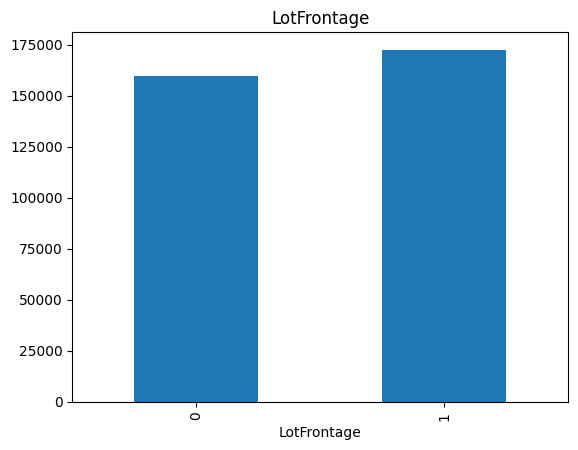

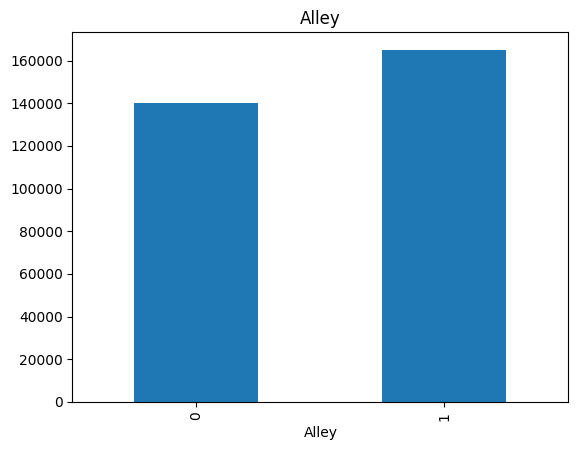

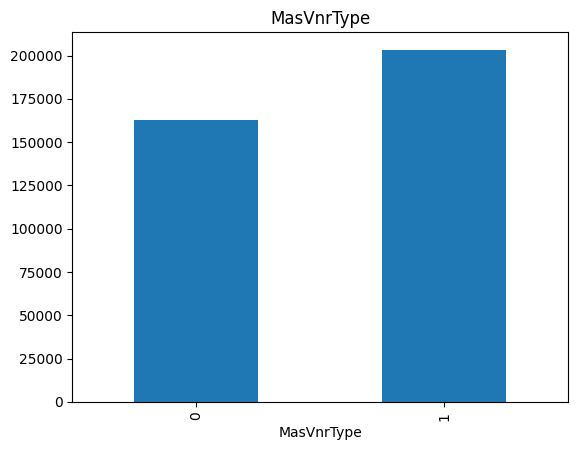

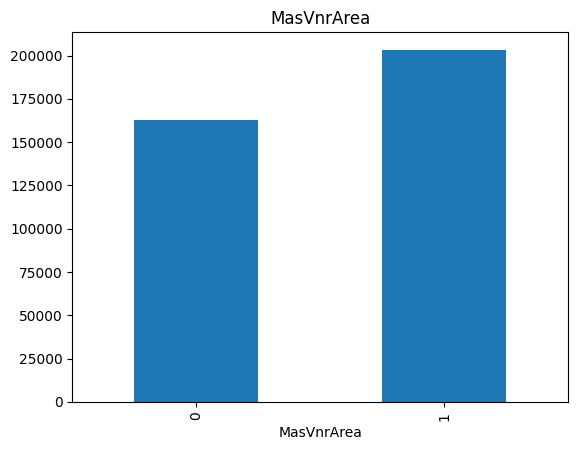

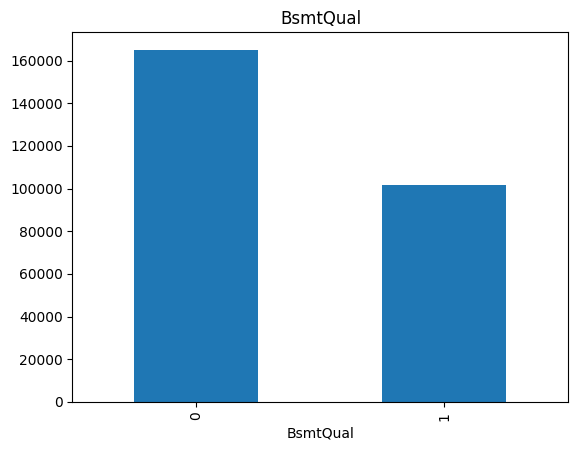

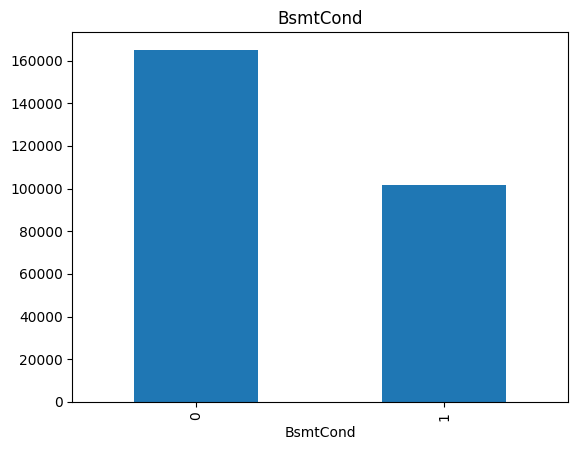

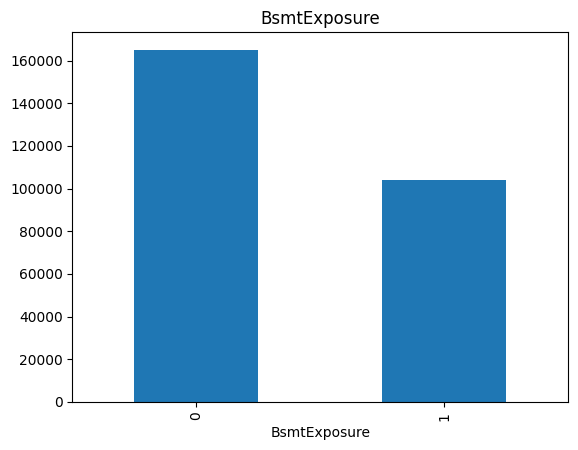

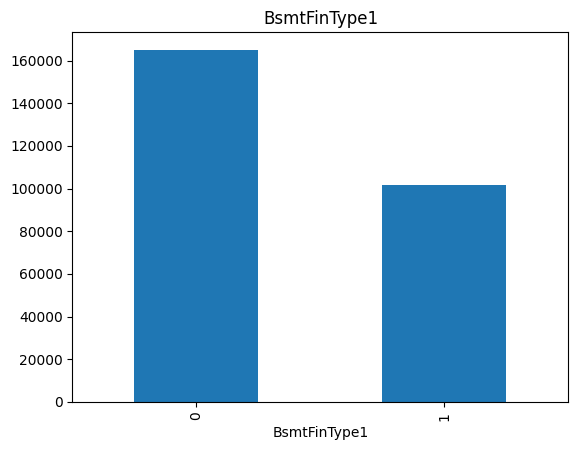

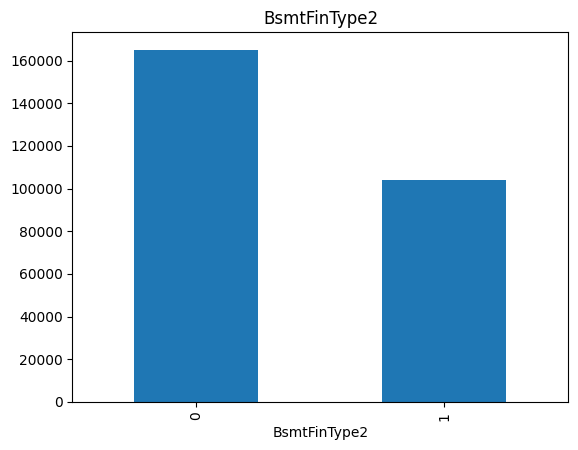

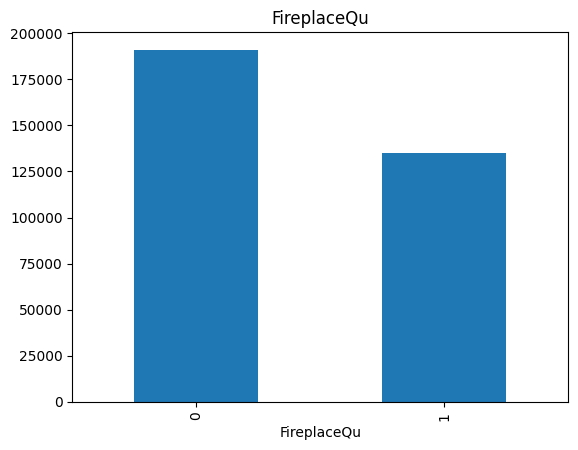

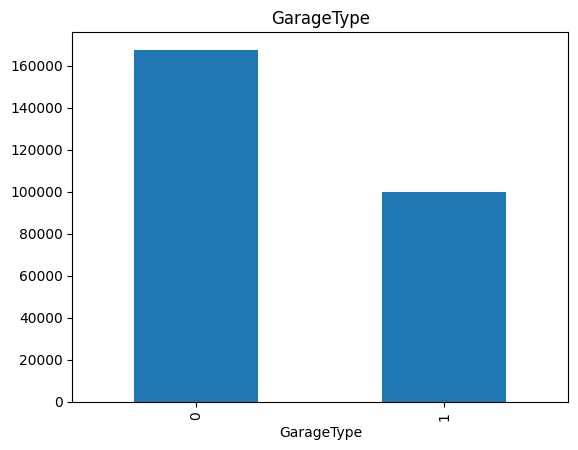

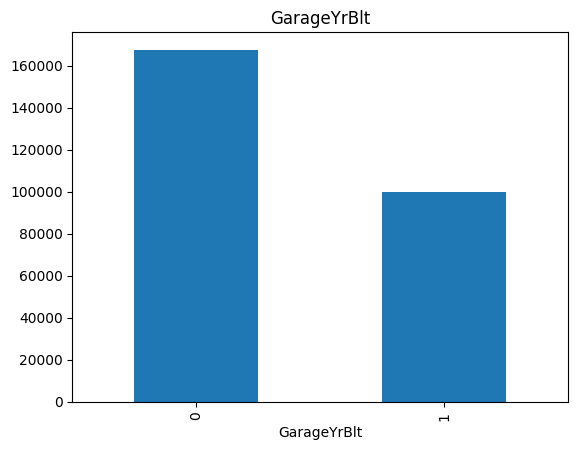

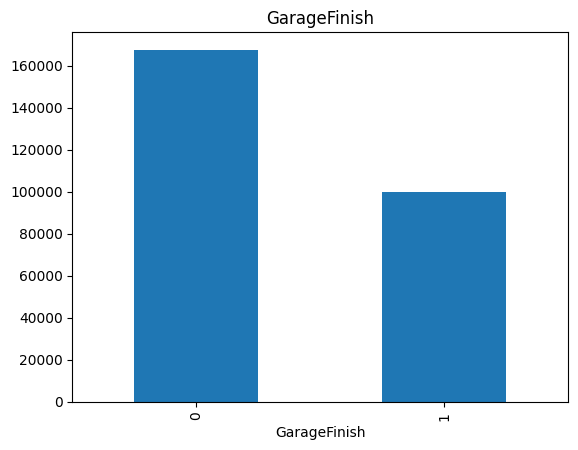

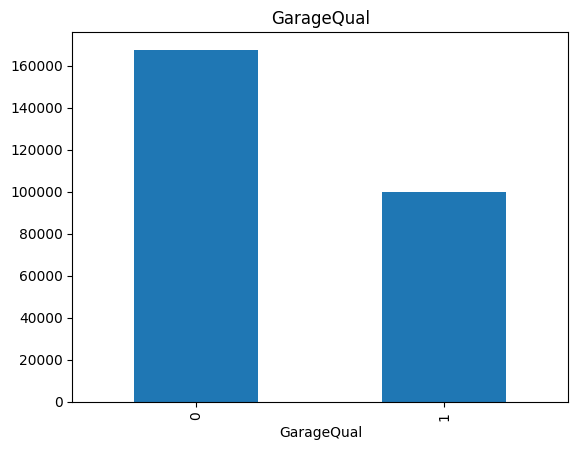

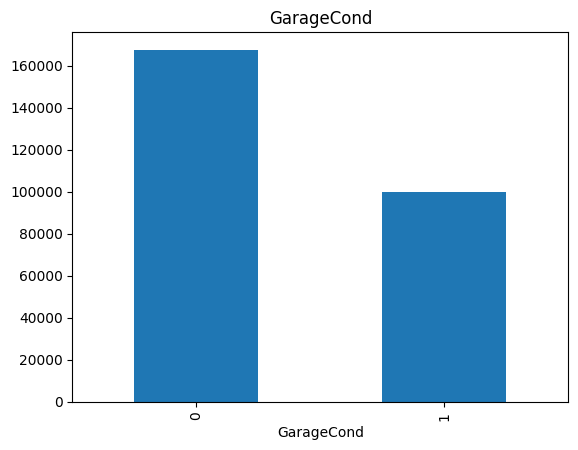

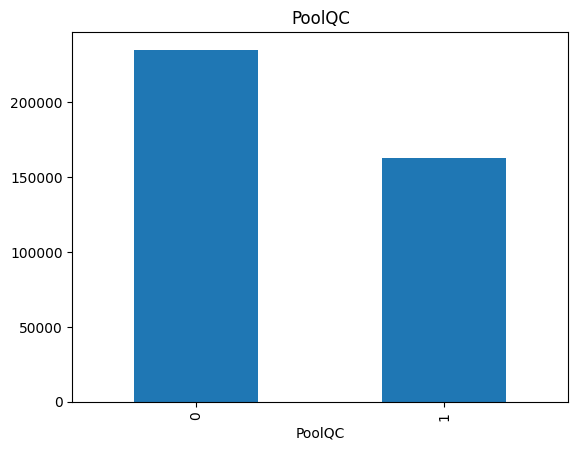

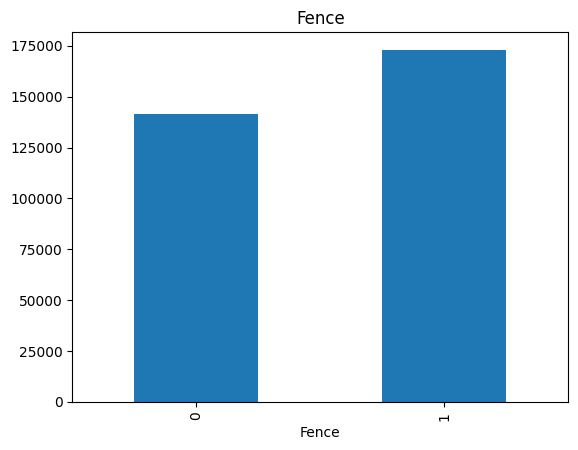

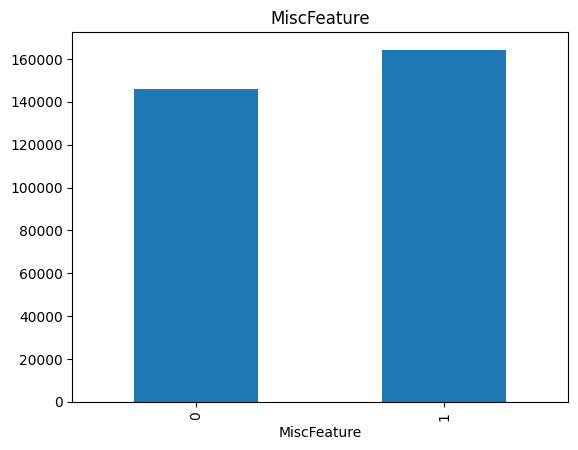

In [28]:
for feature in nan_cols:
    df = train_data.copy()

    # Replacing NaN values with 1 and any others with 0
    df[feature] = np.where(df[feature].isna(), 1, 0)

    # Calculating the median sales price where information is missing or present
    df.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

## Numerical Features

In [30]:
num_cols = [feature for feature in train_data.columns if train_data[feature].dtype != 'O']
# O dtype() is used to check if the element is an object(not numeric)
print('No. of numeric features is',len(num_cols))
print(num_cols)
train_data[num_cols].head(10)

No. of numeric features is 38
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   
5   6          50         85.0    14115            5            5       1993   
6   7          20         75.0    10084            8            5       2004   
7   8          60          NaN    10382            7            6       1973   
8   9          50         51.0     6120            7            5       1931   
9  10         190         50.0     7420            5            6       1939   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   
5          1995         0.0         732           0         64          796   
6          2005       186.0        1369           0        317         1686   
7          1973       240.0         859          32        216         1107   
8          1950         0.0           0           0        952          952   
9          1950         0.0         851           0        140          991   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   
5       796       566             0       1362             1             0   
6      1694         0             0       1694             1             0   
7      1107       983             0       2090             1             0   
8      1022       752             0       1774             0             0   
9      1077         0             0       1077             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   
5         1         1             1             1             5           0   
6         2         0             3             1             7           1   
7         2         1             3             1             7           2   
8         2         0             2             2             8           2   
9         1         0             2             2             5           2   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   
5       1993.0           2         480          40           30   
6       2004.0           2         636         255    

### Temporal Variables (DateTime variables)(eg - YearBuilt)

In this dataset, we have 4 date time features (YearBuilt, YearRemodAdd, GarageYrBlt, YrSold). The information to be extracted from these variables will be like no. of days, years. An example can be like the (year of house building - year of selling)

In [31]:
time_feat = [feature for feature in train_data.columns if "Yr" in feature or "Year" in feature]
time_feat

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [33]:
for feature in time_feat:
    print(feature, train_data[feature].unique())
    print("--x--"*20)

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
--x----x----x----x----x----x----x----x----x----x----x----x----x----x----x----x----x----x----x----x--
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 19

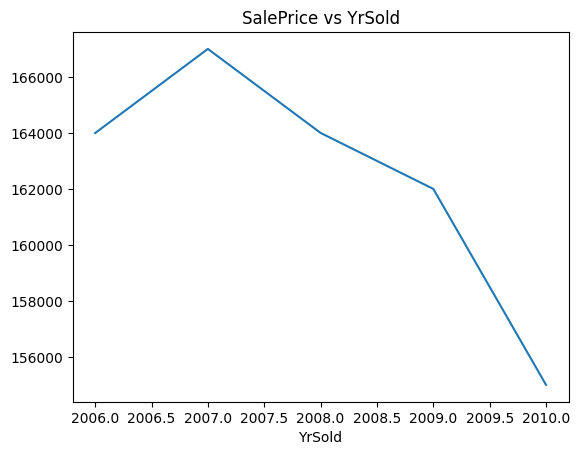

In [35]:
# Analyzing the temporal features
# Checking the relation between yrSold and SalesPrice

train_data.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('YrSold')
plt.title("SalePrice vs YrSold")
plt.show()

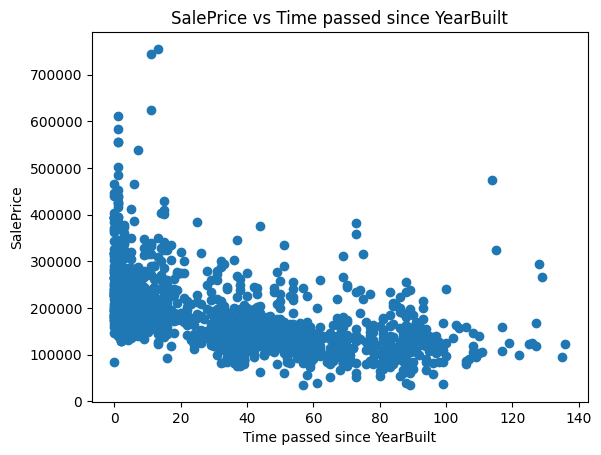

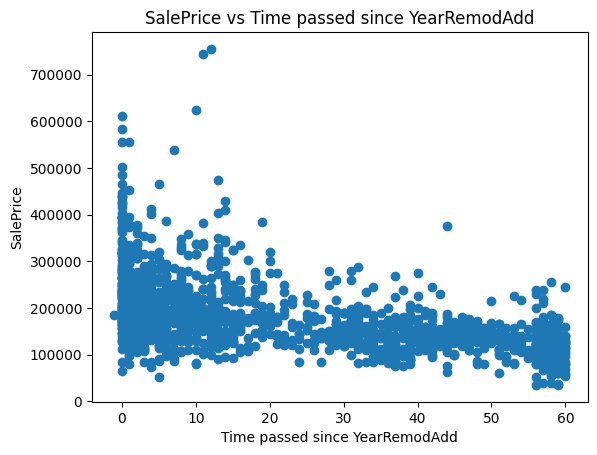

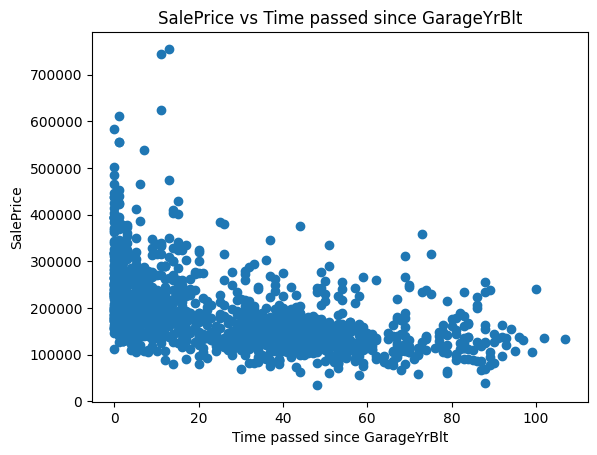

In [37]:
# Finding the difference between YrSold and and other year features and plotting against SalePrice
#This to check that how does age ofhouse,or timepassed since renovation or garage built affect SalePrice

for feature in time_feat:
    if feature != 'YrSold':
        data = train_data.copy()

        data[feature] = data['YrSold'] - data[feature]
        plt.scatter(data[feature], data['SalePrice'])
        plt.xlabel(f"Time passed since {feature}")
        plt.ylabel("SalePrice")
        plt.title(f"SalePrice vs Time passed since {feature}")
        plt.show()

### Now here, we see that the houses that were built/ renovated/ got a garage more recently are sold for higher SalePrice

Now looking at our other numerical variables and checking to see if they are :

Discrete
Continuous

In [38]:
# If the features have less than 25 unique values, I will consider them discrete
# I will not be considering temporal features for this

disc_feat=[feature for feature in num_cols if len(train_data[feature].unique())<25 and feature not in time_feat]

print(f"No. of discrete features is {len(disc_feat)}")
print(disc_feat)
train_data[disc_feat].head(10)

No. of discrete features is 17
['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold']


MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0          60            7            5             0             1   
1          20            6            8             0             0   
2          60            7            5             0             1   
3          70            7            5             0             1   
4          60            8            5             0             1   
5          50            5            5             0             1   
6          20            8            5             0             1   
7          60            7            6             0             1   
8          50            7            5             0             0   
9         190            5            6             0             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   
5             0         1         1             1             1             5   
6             0         2         0             3             1             7   
7             0         2         1             3             1             7   
8             0         2         0             2             2             8   
9             0         1         0             2             2             5   

   Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  MoSold  
0           0           2          0         0        0       2  
1           1           2          0         0        0       5  
2           1           2          0         0        0       9  
3           1           3          0         0        0       2  
4           1           3          0         0        0      12  
5           0           2        320         0      700      10  
6           1           2          0         0        0       8  
7           2           2          0         0      350      11  
8           2           2          0         0        0       4  
9           2           1          0         0        0       1

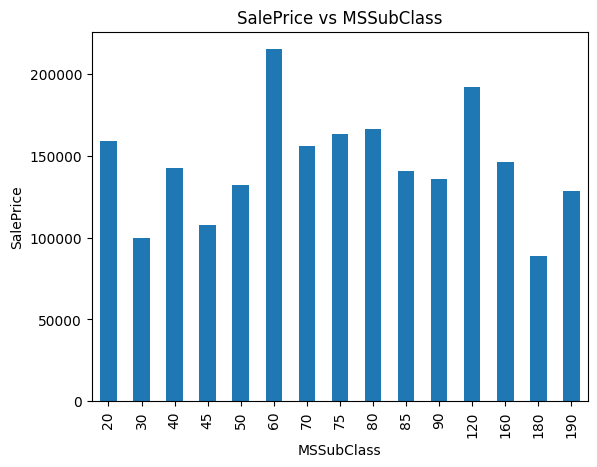

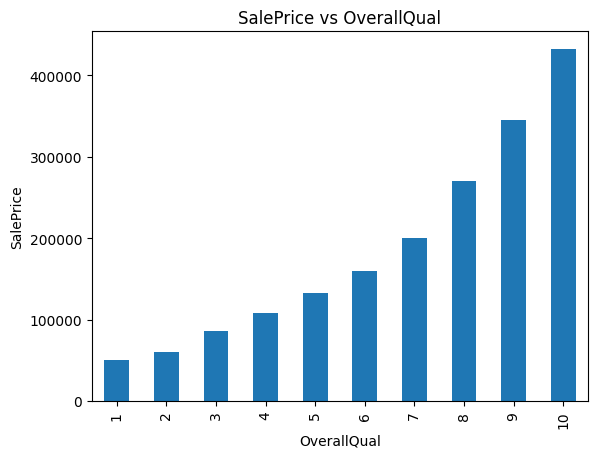

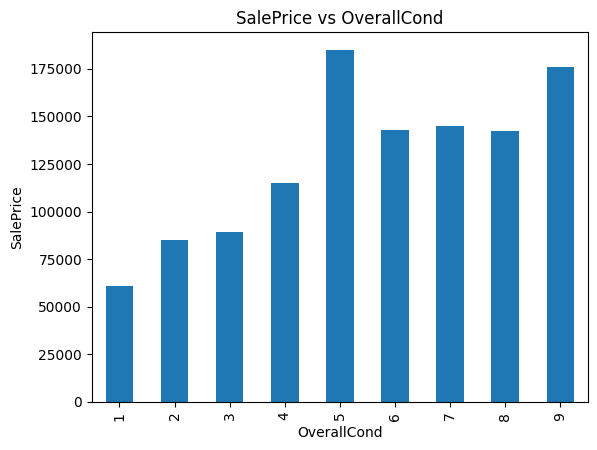

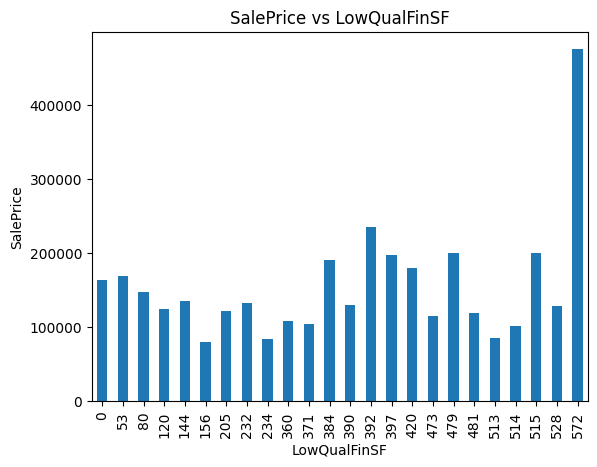

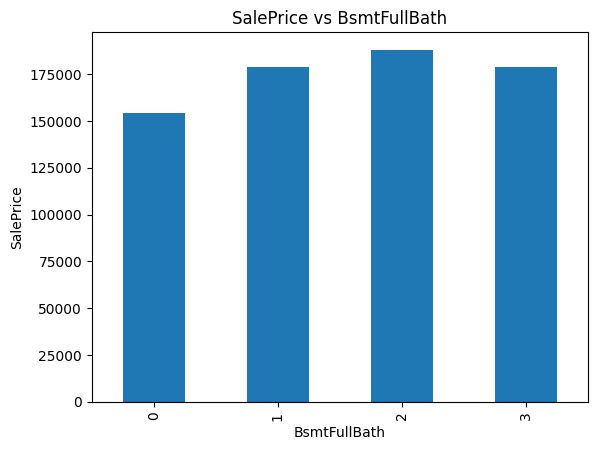

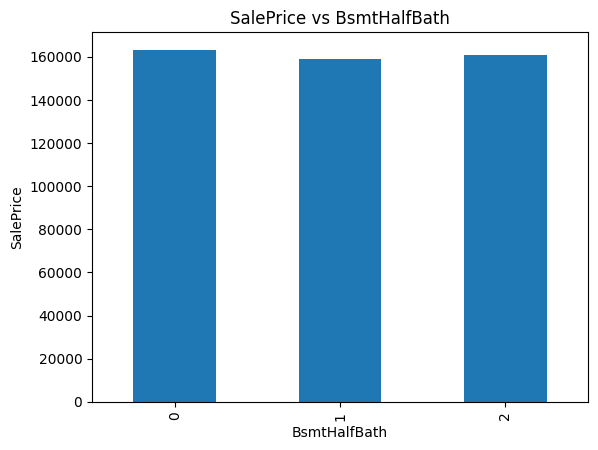

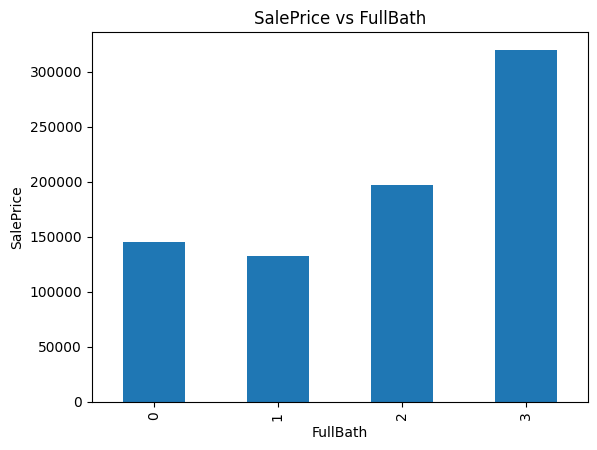

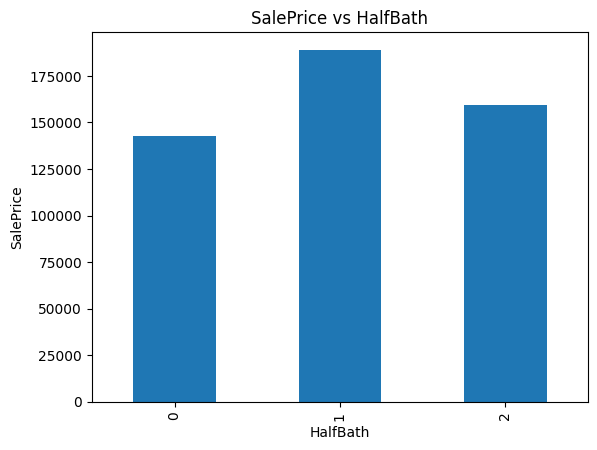

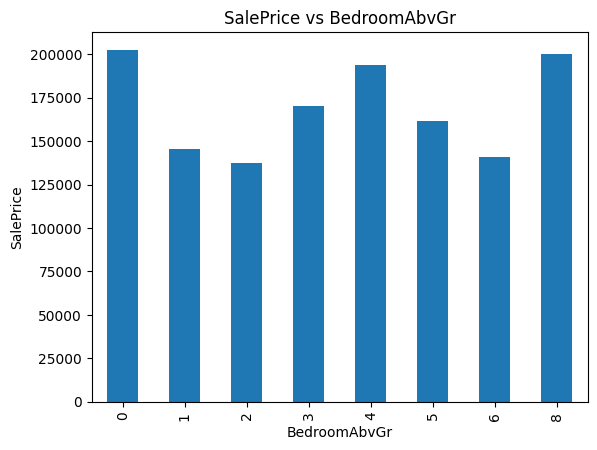

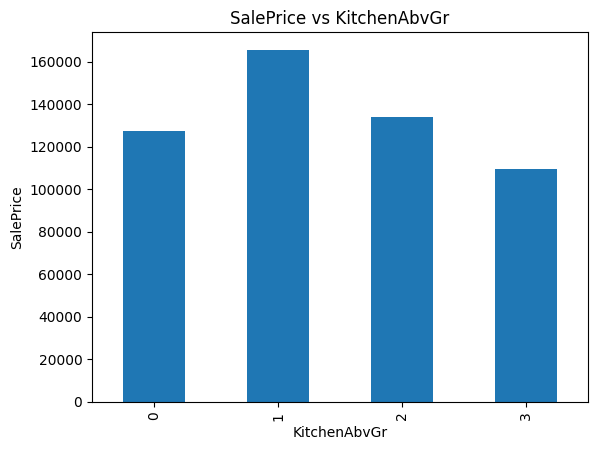

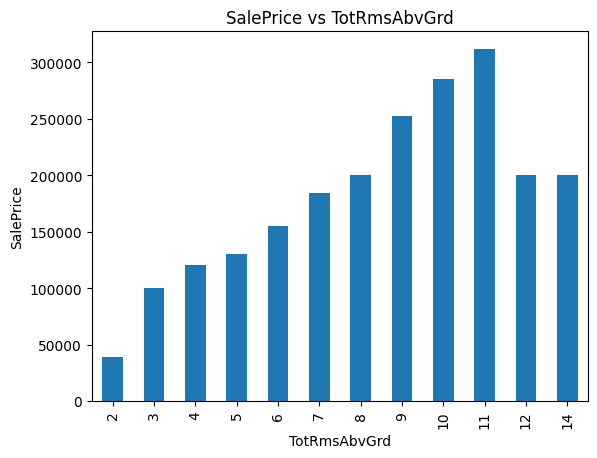

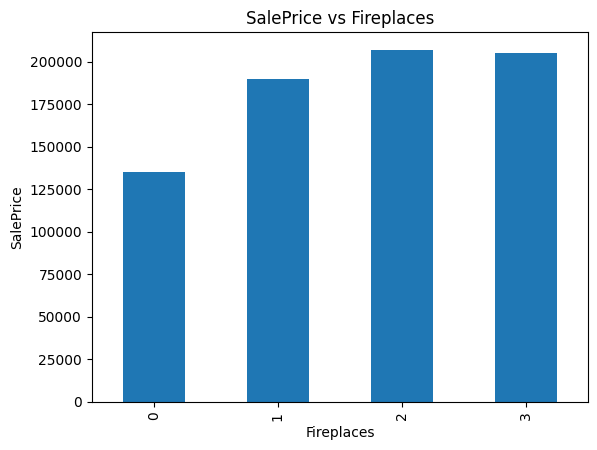

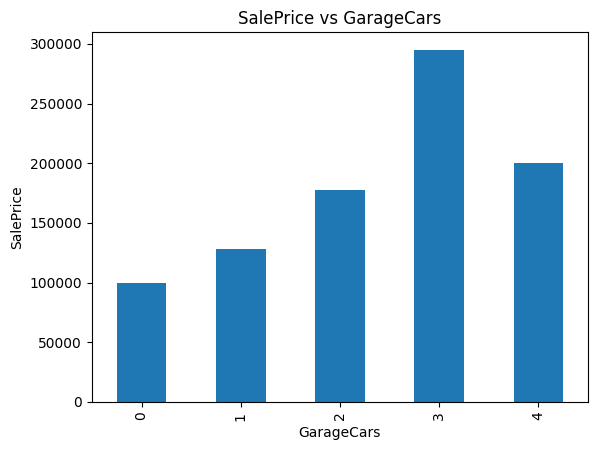

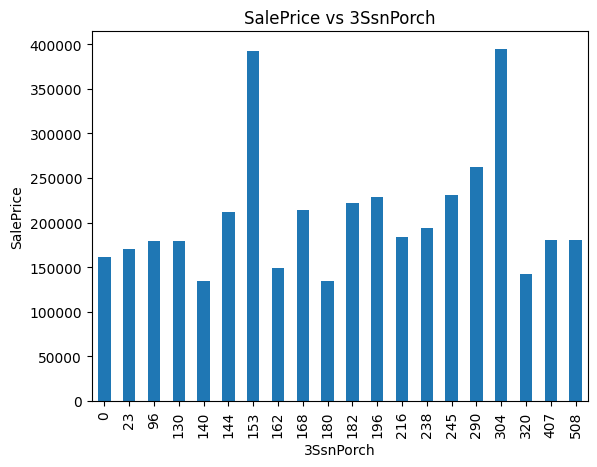

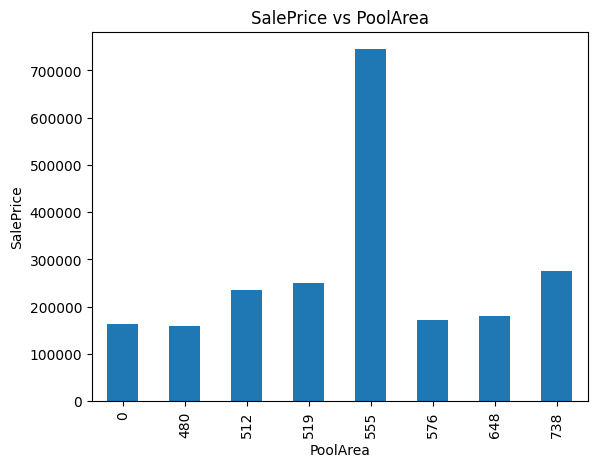

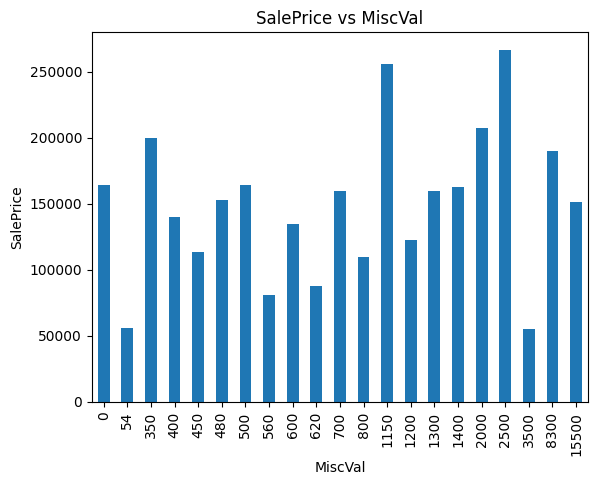

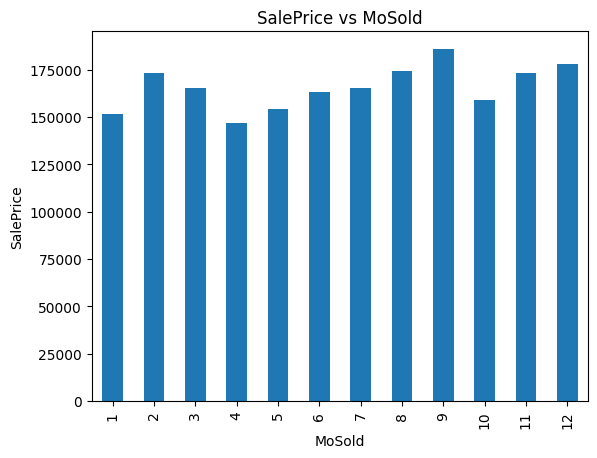

In [40]:
# Making bar plots of these discrete features with SalePrice

for feature in disc_feat:
    train_data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(f'SalePrice vs {feature}')
    plt.ylabel("SalePrice")
    plt.xlabel(feature)
    plt.show()

## Now moving on to the continuous numeric features

In [42]:
# numeric feature that are not discrete can be used to find continuous

cont_feat = [feature for feature in num_cols if feature not in time_feat + disc_feat + ['Id']]
print(f"No. of continuous features is {len(cont_feat)}")
print(cont_feat)
train_data[cont_feat].head(10)

No. of continuous features is 16
['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']


LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   
5         85.0    14115         0.0         732           0         64   
6         75.0    10084       186.0        1369           0        317   
7          NaN    10382       240.0         859          32        216   
8         51.0     6120         0.0           0           0        952   
9         50.0     7420         0.0         851           0        140   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageArea  WoodDeckSF  \
0          856       856       854       1710         548           0   
1         1262      1262         0       1262         460         298   
2          920       920       866       1786         608           0   
3          756       961       756       1717         642           0   
4         1145      1145      1053       2198         836         192   
5          796       796       566       1362         480          40   
6         1686      1694         0       1694         636         255   
7         1107      1107       983       2090         484         235   
8          952      1022       752       1774         468          90   
9          991      1077         0       1077         205           0   

   OpenPorchSF  EnclosedPorch  ScreenPorch  SalePrice  
0           61              0            0     208500  
1            0              0            0     181500  
2           42              0            0     223500  
3           35            272            0     140000  
4           84              0            0     250000  
5           30              0            0     143000  
6           57              0            0     307000  
7          204            228            0     200000  
8            0            205            0     129900  
9            4              0            0     118000

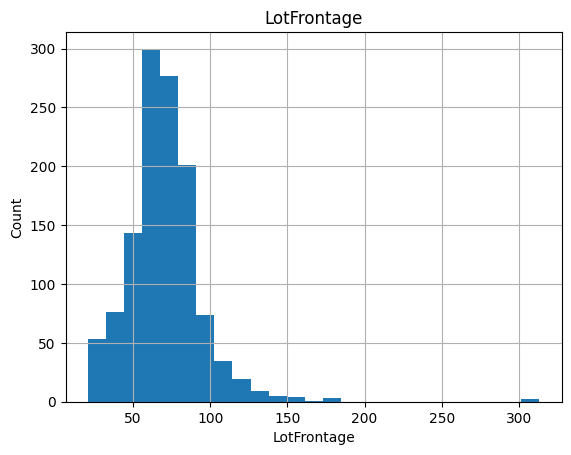

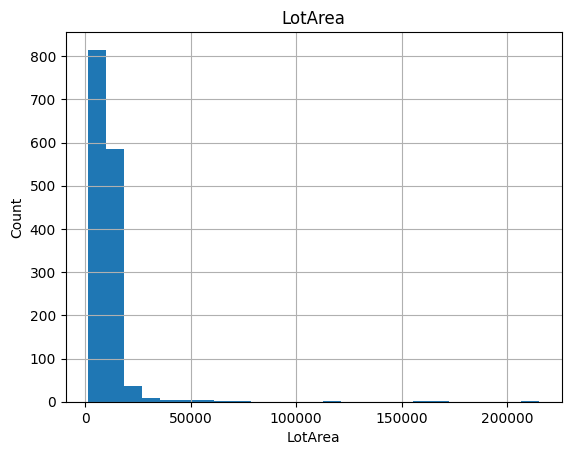

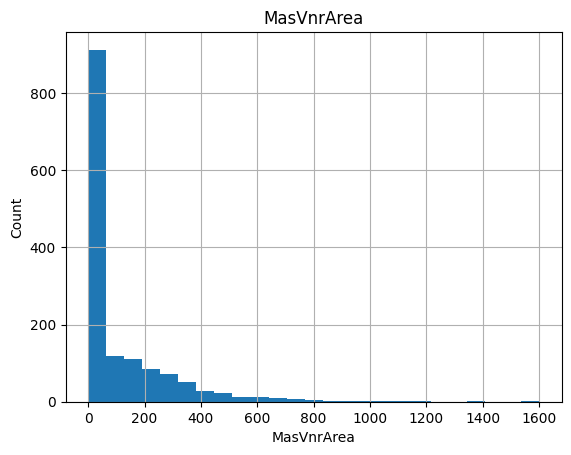

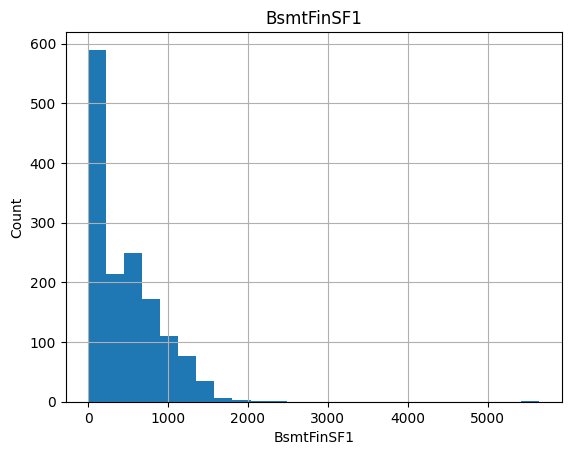

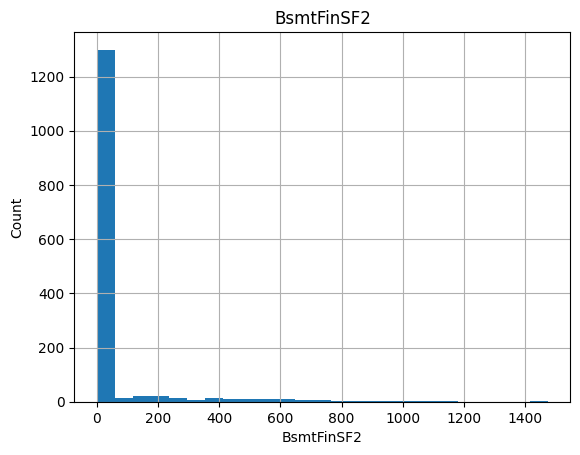

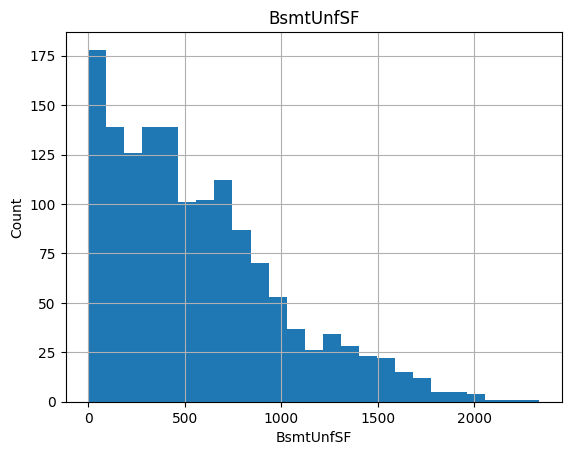

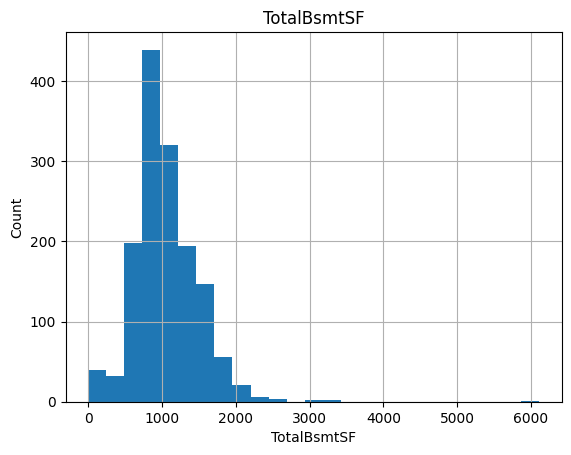

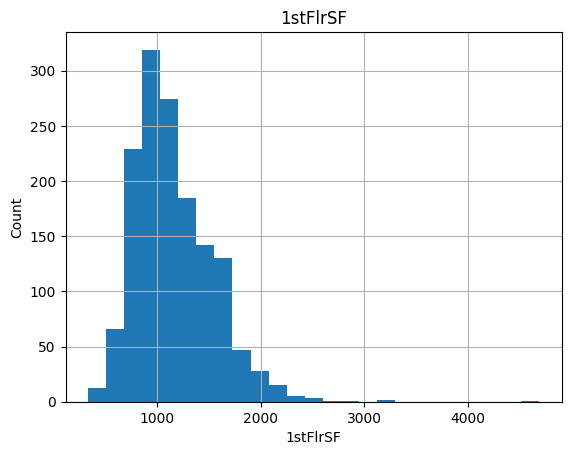

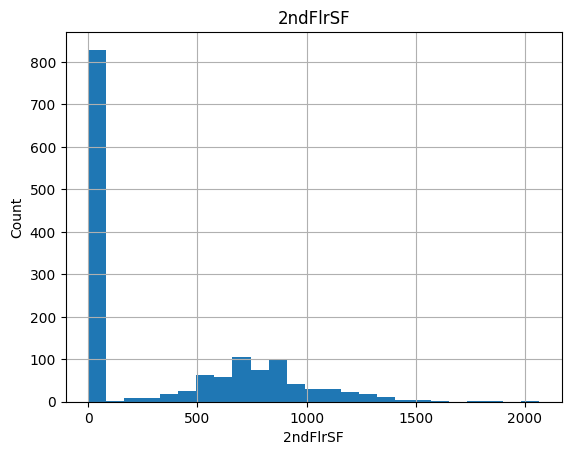

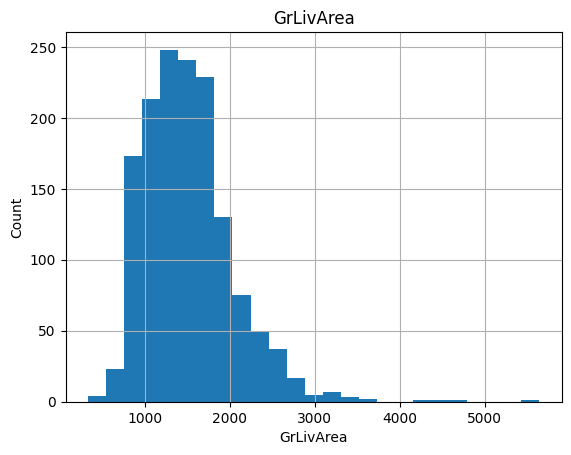

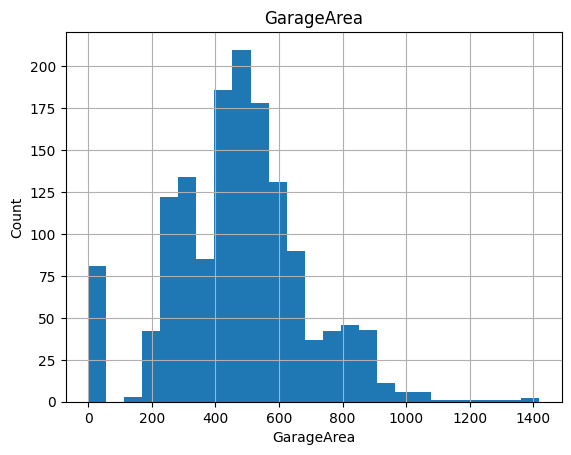

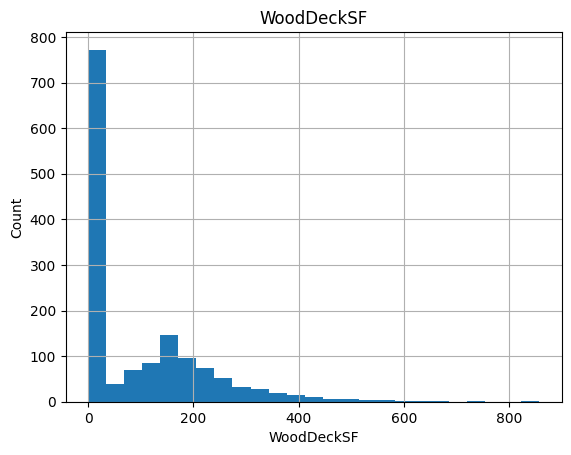

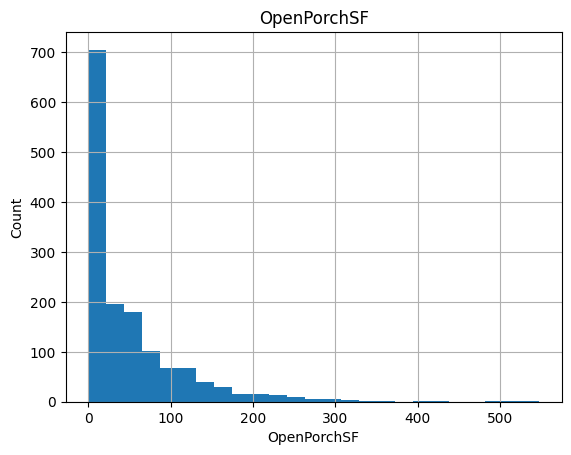

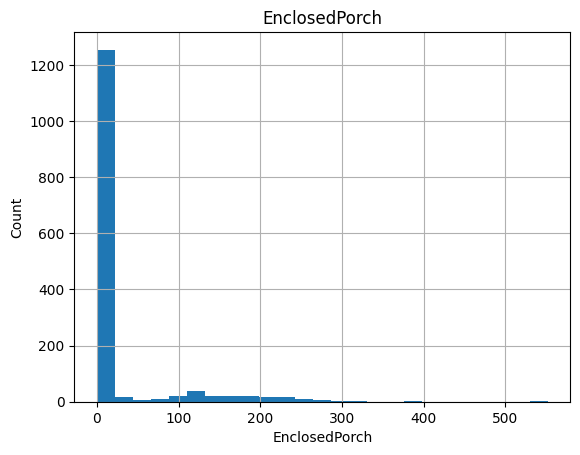

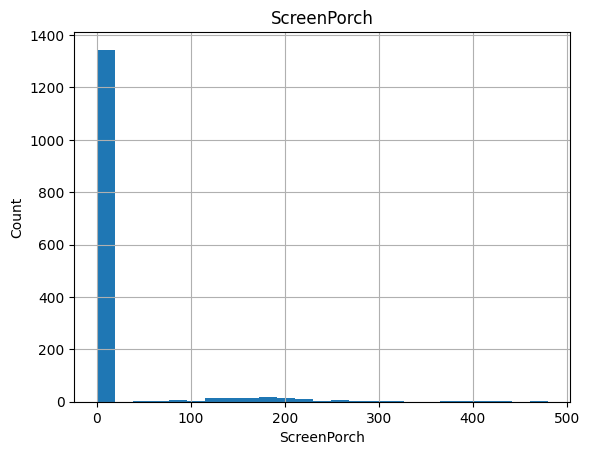

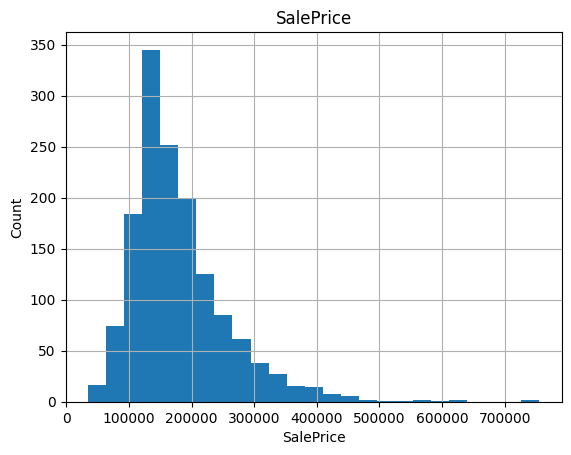

In [44]:
# For continuous features, we will plot their histograms to find their distribution

for feature in cont_feat:
    data = train_data.copy()
    data[feature].hist(bins = 25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

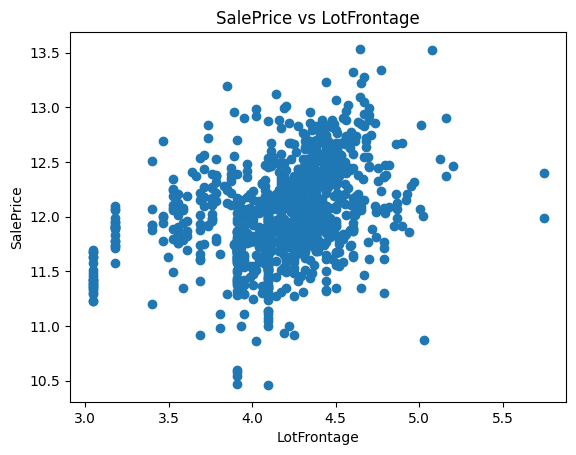

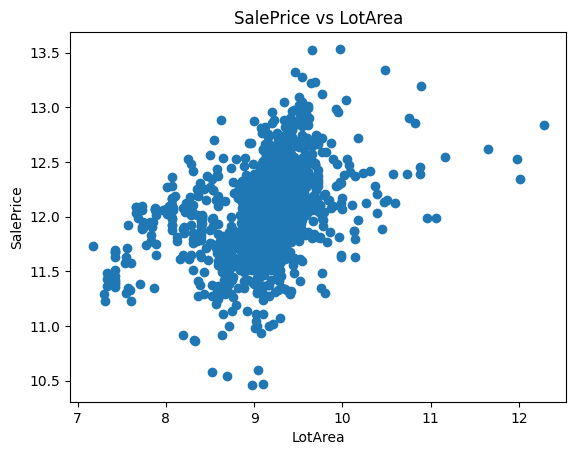

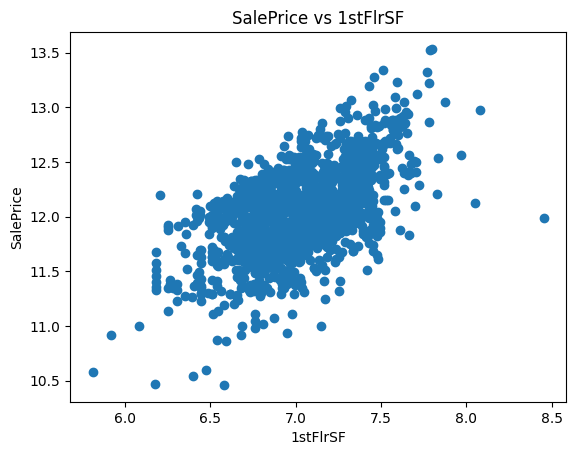

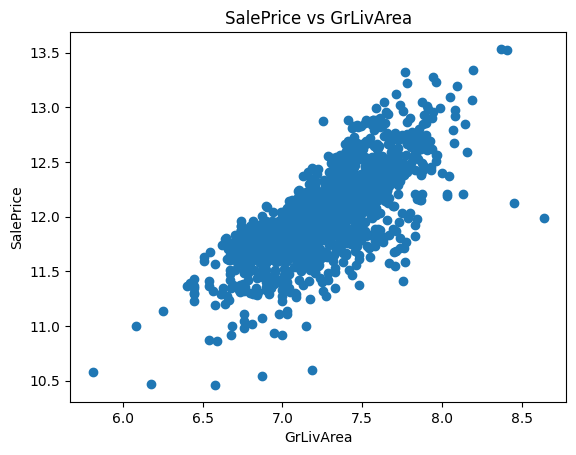

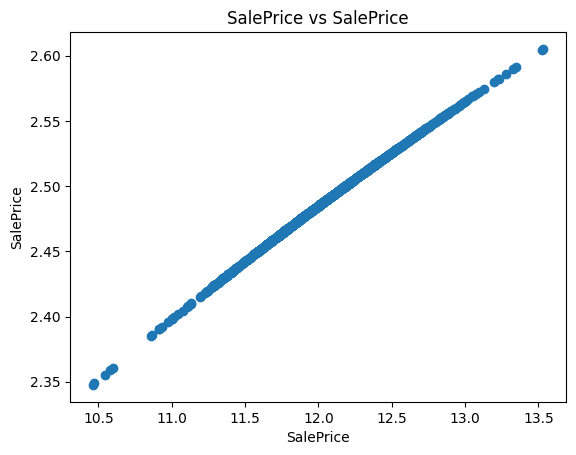

In [46]:
## We will will use logarithmic tranformation on non-gaussian features
for feature in cont_feat:
    data = train_data.copy()
    if 0 in data[feature].unique(): #because log(0) is not defined
        pass
    else:
        data[feature] = np.log(data[feature])
        plt.scatter(data[feature], np.log(data["SalePrice"]))  #Want to plot nirmalised feature with normalised SalePrice
        plt.title(f"SalePrice vs {feature}")
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

## Outliers

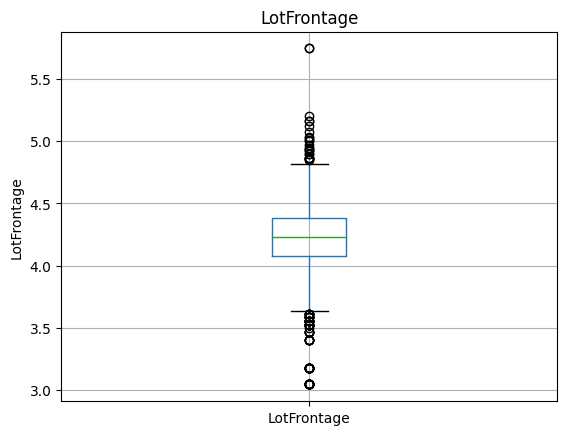

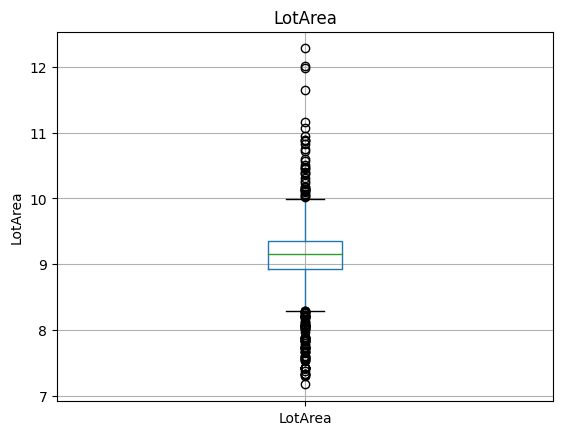

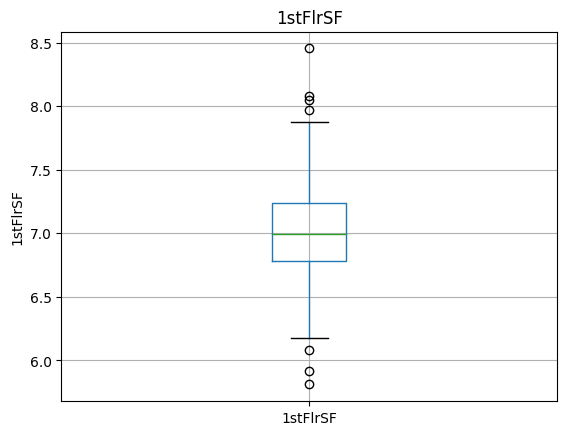

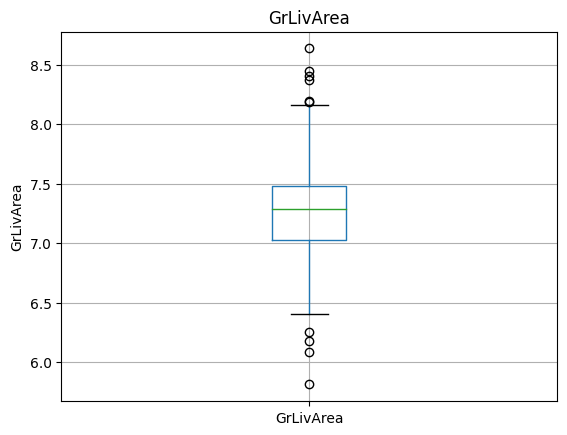

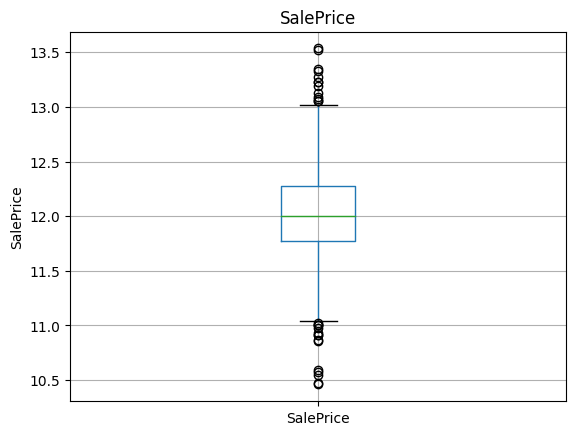

In [48]:
# Using boxplot to find outliers

for feature in cont_feat:
    data = train_data.copy()

    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(column = feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

## Categorical Features

In [50]:
cat_feat = [feature for feature in train_data.columns if data[feature].dtype == "O"]
print(f"No. of categorical features is {len(cat_feat)}")
print(cat_feat)
train_data[cat_feat].head(10)

No. of categorical features is 43
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   
5       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
6       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
7       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
8       RM   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
9       RL   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   
5      Mitchel       Norm       Norm     1Fam     1.5Fin     Gable  CompShg   
6      Somerst       Norm       Norm     1Fam     1Story     Gable  CompShg   
7       NWAmes       PosN       Norm     1Fam     2Story     Gable  CompShg   
8      OldTown     Artery       Norm     1Fam     1.5Fin     Gable  CompShg   
9      BrkSide     Artery     Artery   2fmCon     1.5Unf     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
5     VinylSd     VinylSd       None        TA        TA       Wood       Gd   
6     VinylSd     VinylSd      Stone        Gd        TA      PConc       Ex   
7     HdBoard     HdBoard      Stone        TA        TA     CBlock       Gd   
8     BrkFace     Wd Shng       None        TA        TA     BrkTil       TA   
9     MetalSd     MetalSd       None        TA        TA     BrkTil       TA   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   
5       TA           No          GLQ          Unf    GasA        Ex   
6       TA           Av          GLQ          Unf    GasA        Ex   
7       TA           Mn          ALQ          BLQ    GasA        Ex   
8       TA           No          Unf          Unf    GasA        Gd   
9       TA           No          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   
5          Y      SBrkr          TA        Typ         NaN     Attchd   
6          Y      SBrkr          Gd        Typ          Gd     Attchd   
7          Y      SBrkr   

In [51]:
# Checking unique categories of each feature

for feature in cat_feat:
    print(f"No. of unique categories in {feature}: {len(data[feature].unique())}")
    print(data[feature].unique())
    print('--x--'*20)

No. of unique categories in MSZoning: 5
['RL' 'RM' 'C (all)' 'FV' 'RH']
--x----x----x----x----x----x----x----x----x----x----x----x----x----x----x----x----x----x----x----x--
No. of unique categories in Street: 2
['Pave' 'Grvl']
--x----x----x----x----x----x----x----x----x----x----x----x----x----x----x----x----x----x----x----x--
No. of unique categories in Alley: 3
[nan 'Grvl' 'Pave']
--x----x----x----x----x----x----x----x----x----x----x----x----x----x----x----x----x----x----x----x--
No. of unique categories in LotShape: 4
['Reg' 'IR1' 'IR2' 'IR3']
--x----x----x----x----x----x----x----x----x----x----x----x----x----x----x----x----x----x----x----x--
No. of unique categories in LandContour: 4
['Lvl' 'Bnk' 'Low' 'HLS']
--x----x----x----x----x----x----x----x----x----x----x----x----x----x----x----x----x----x----x----x--
No. of unique categories in Utilities: 2
['AllPub' 'NoSeWa']
--x----x----x----x----x----x----x----x----x----x----x----x----x----x----x----x----x----x----x----x--
No. of unique c

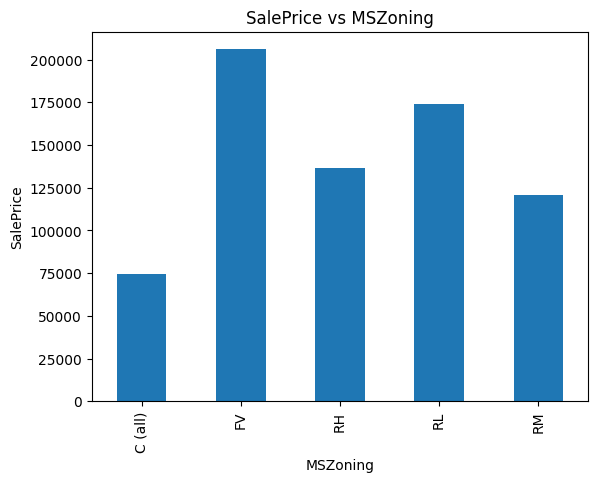

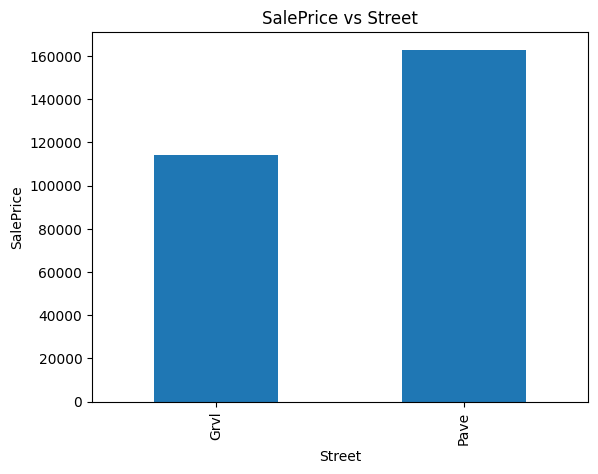

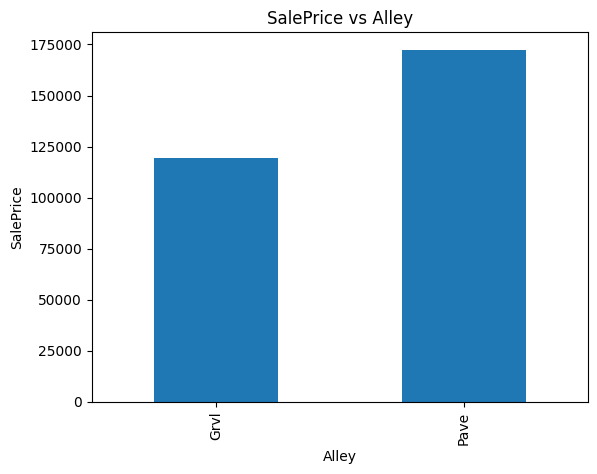

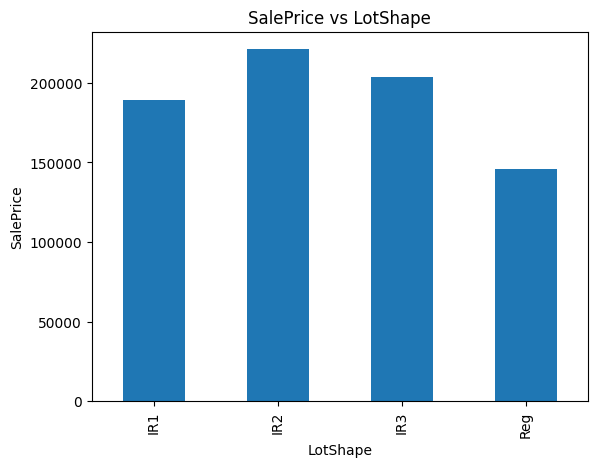

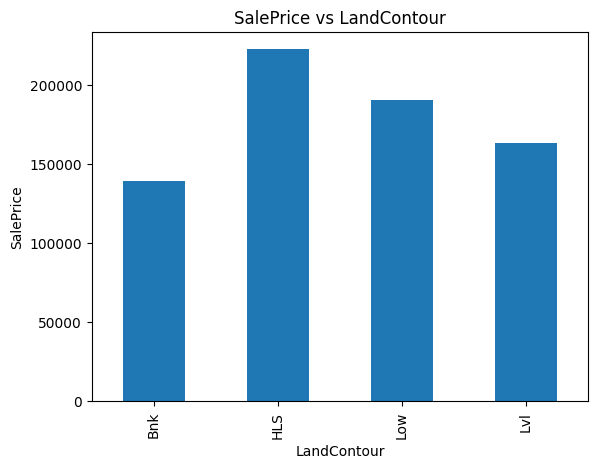

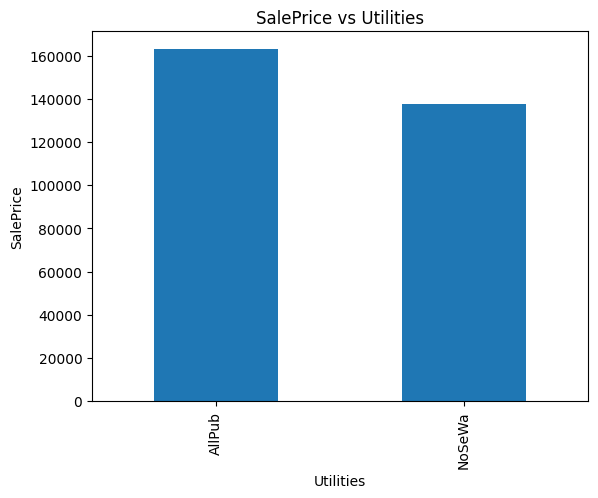

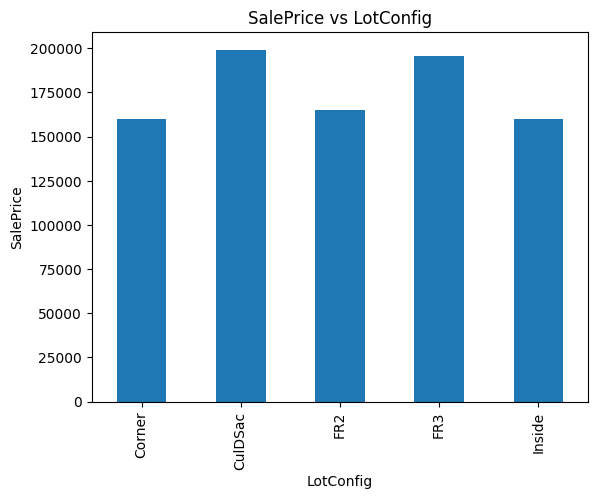

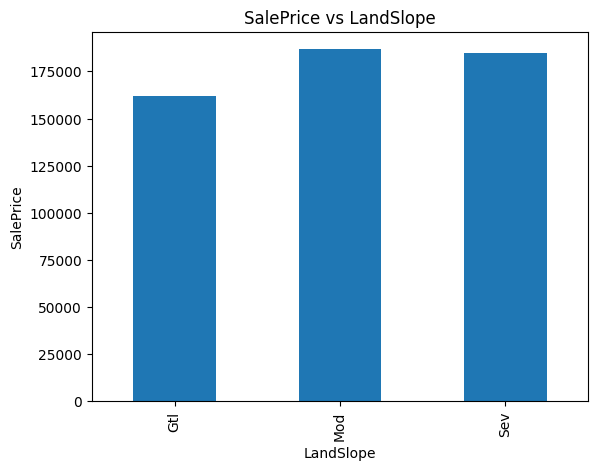

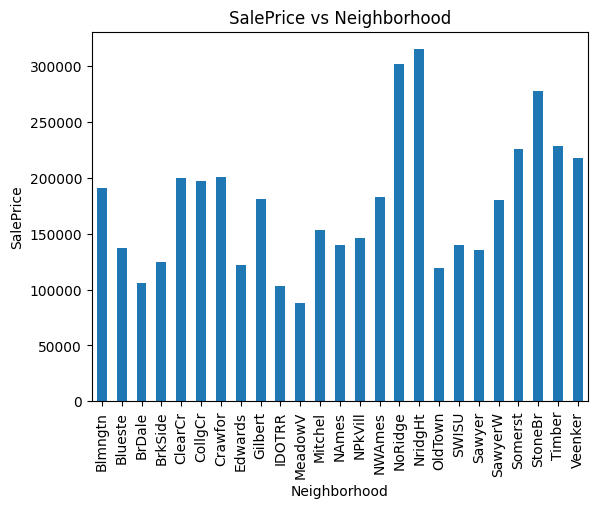

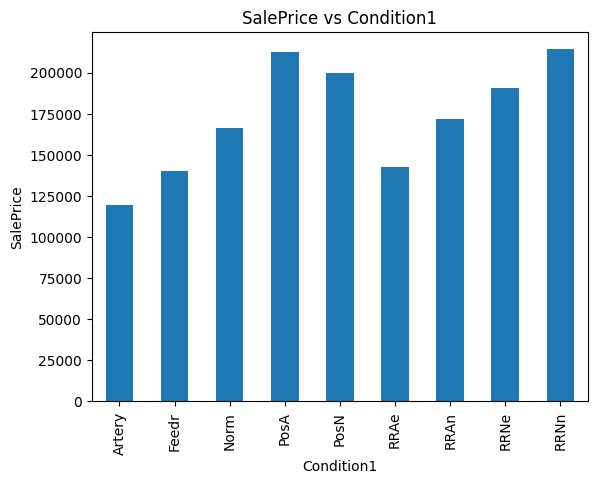

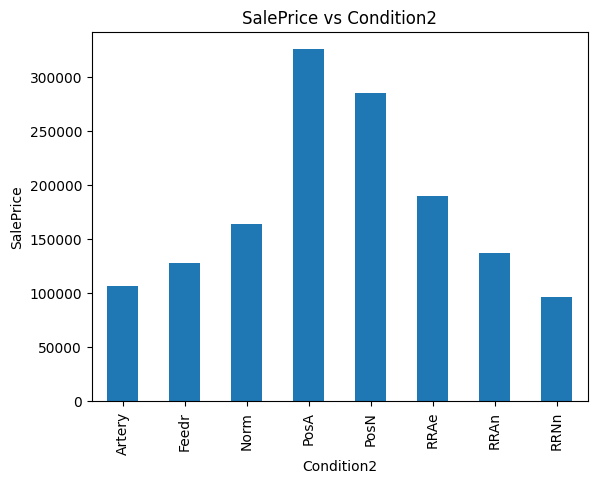

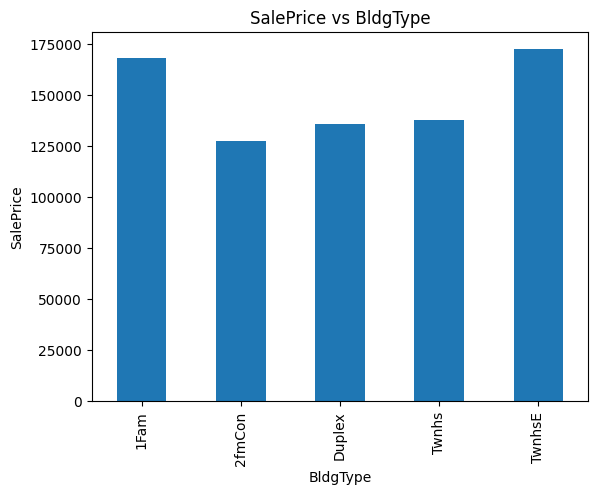

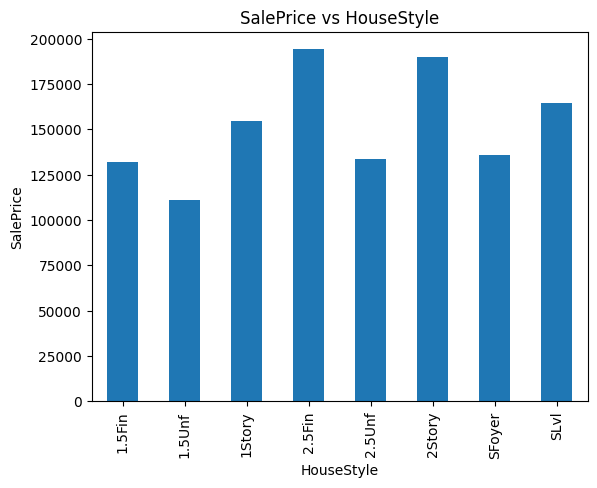

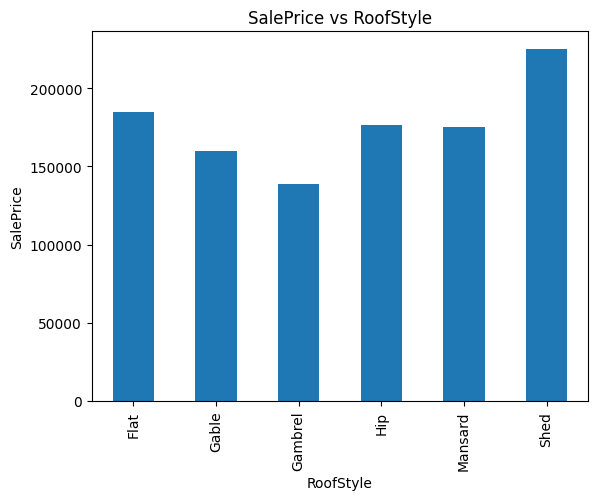

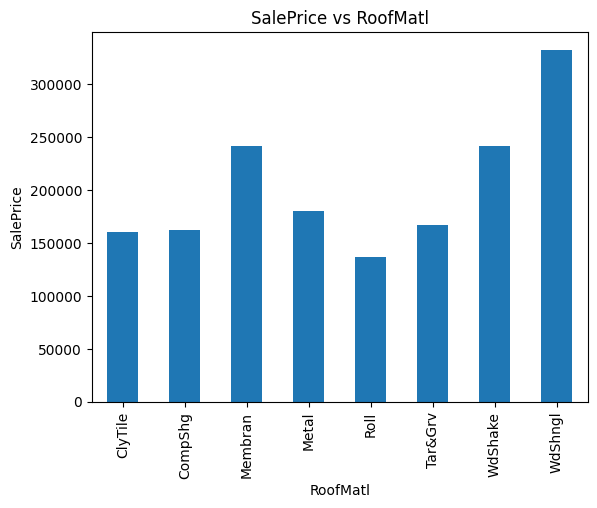

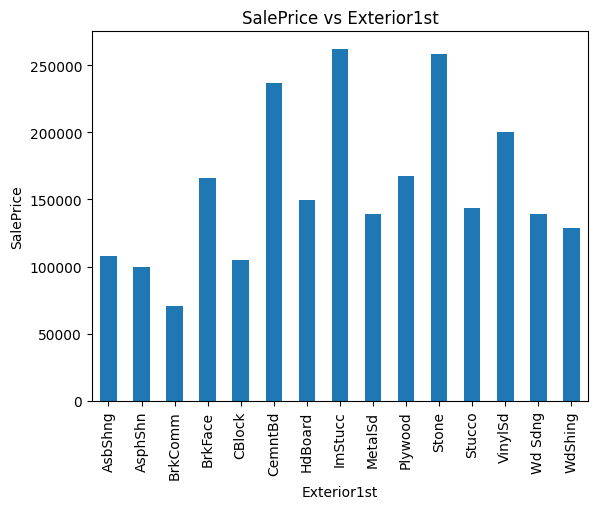

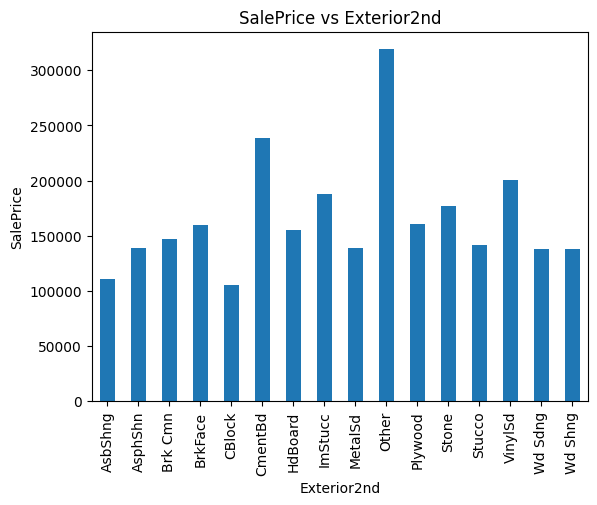

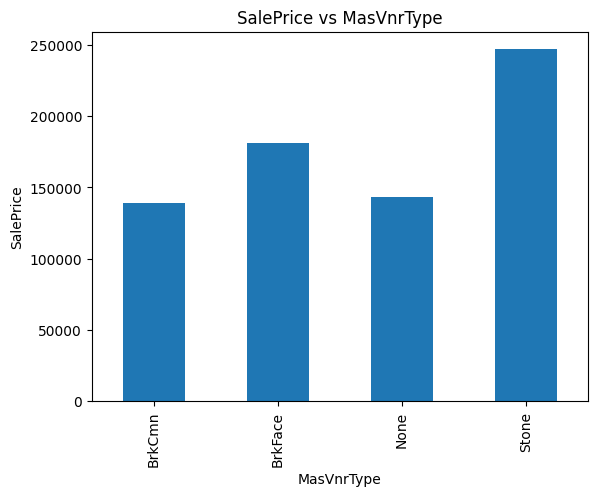

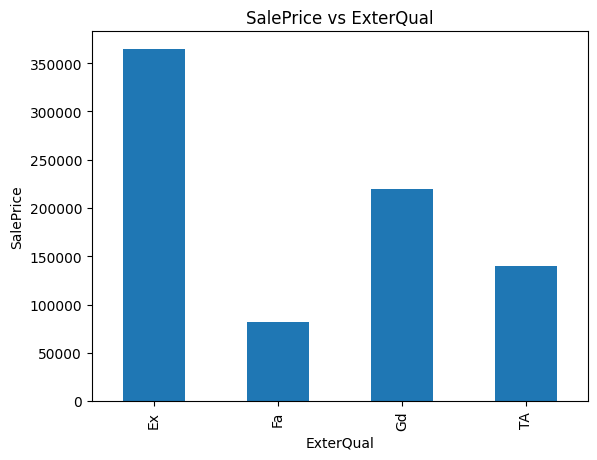

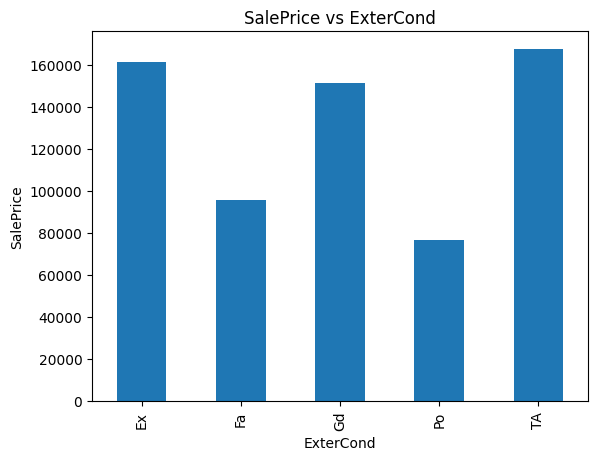

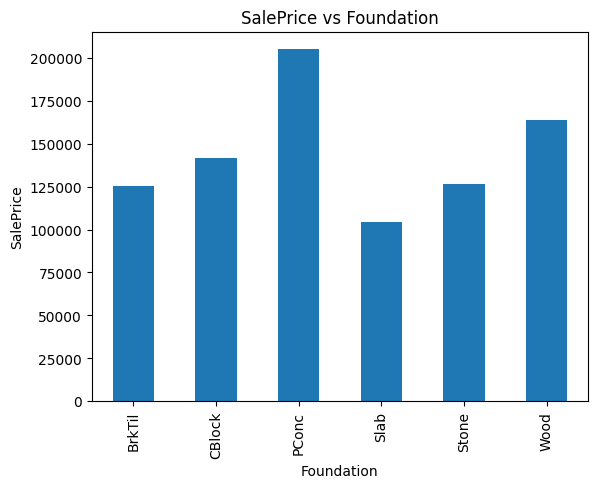

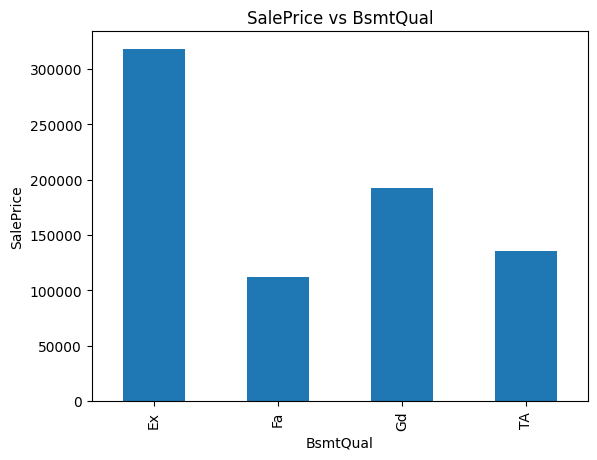

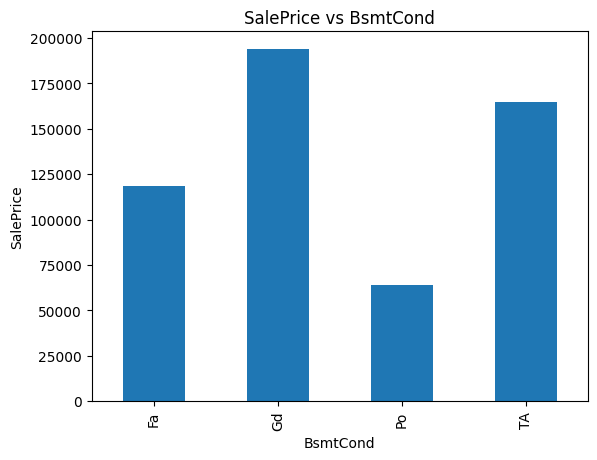

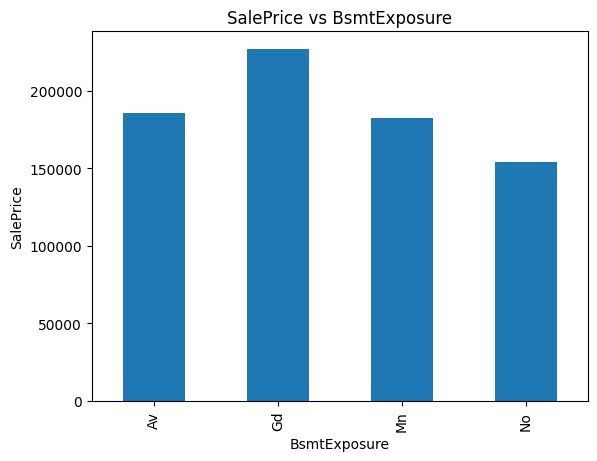

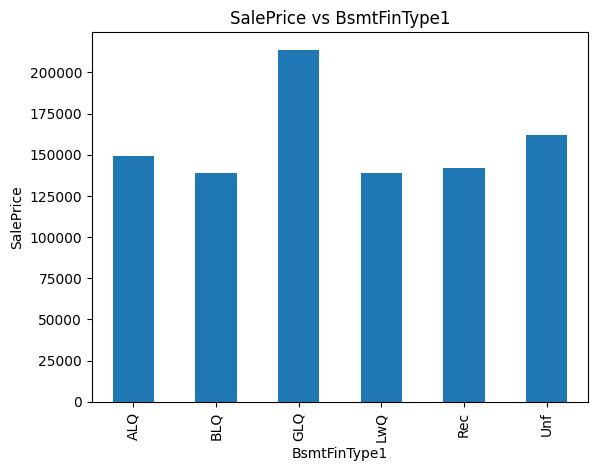

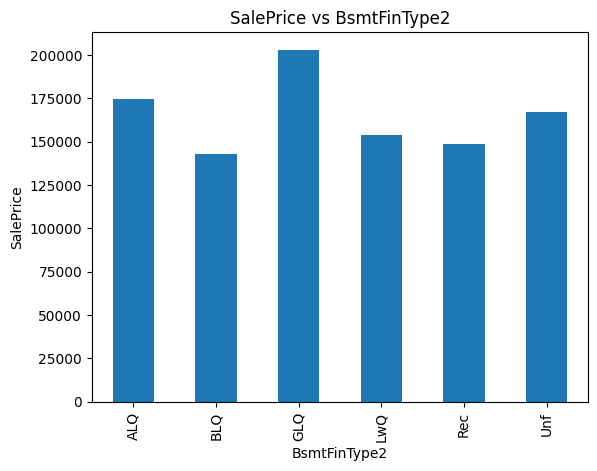

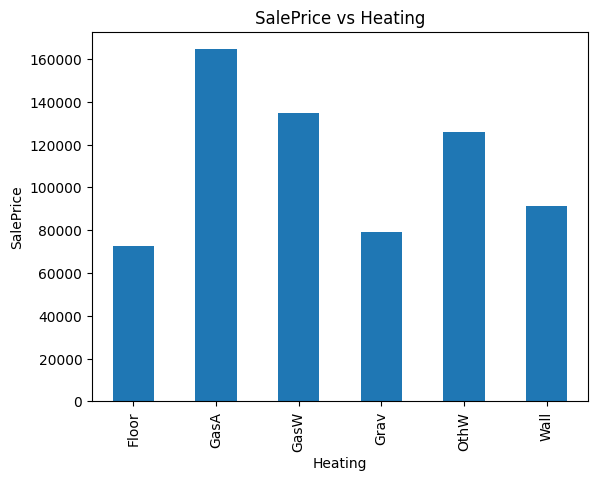

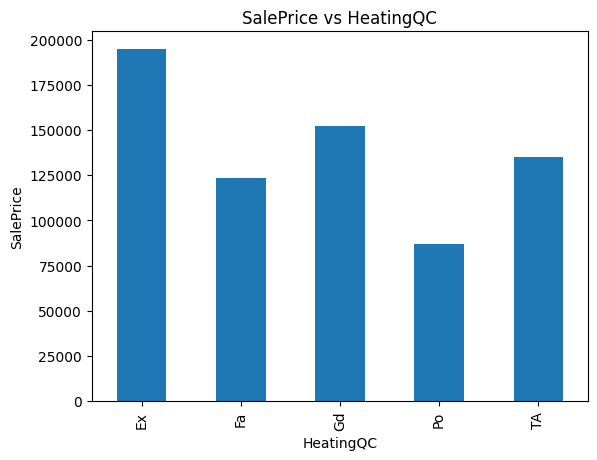

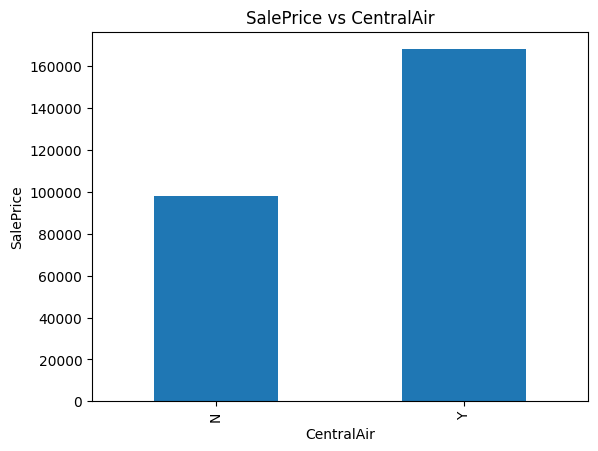

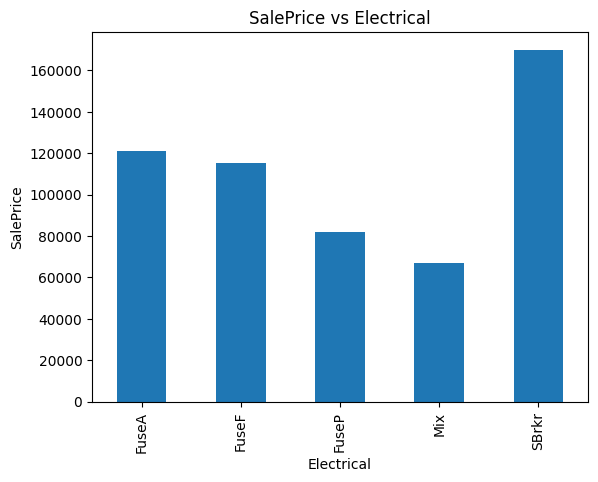

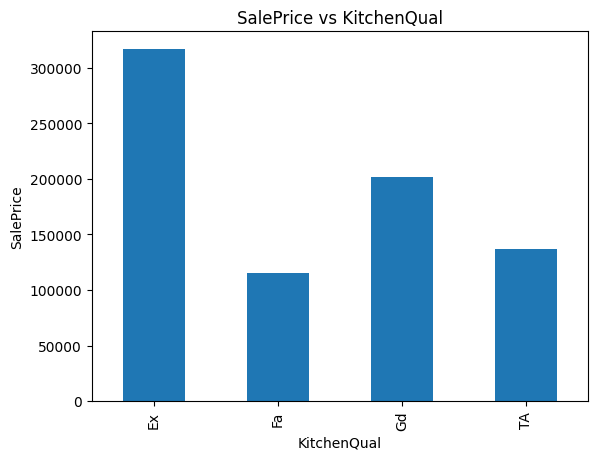

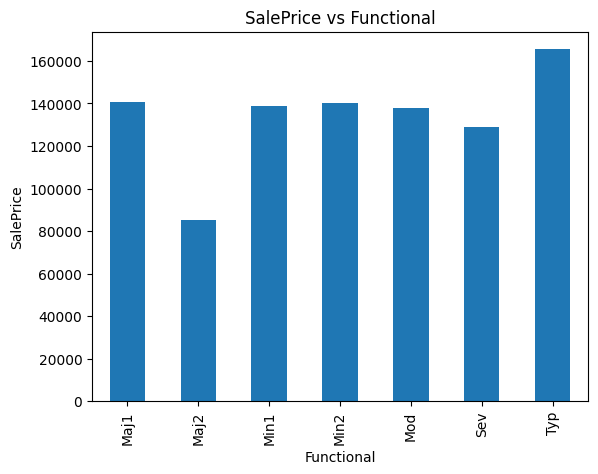

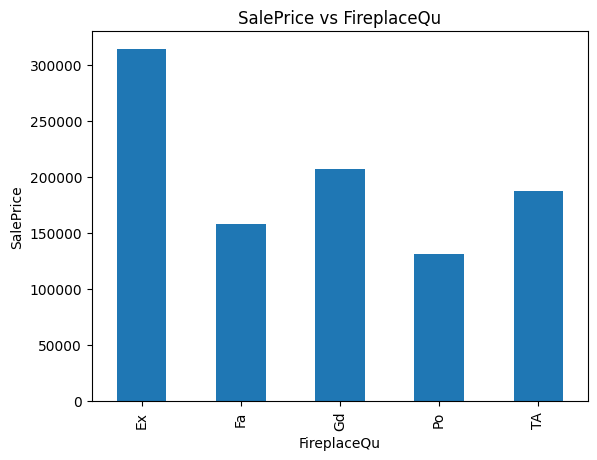

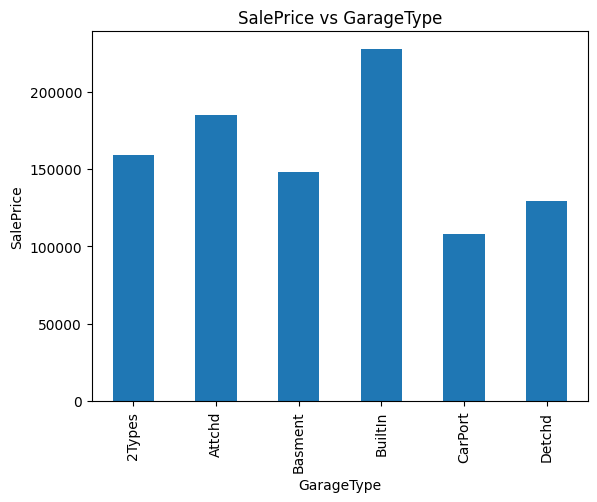

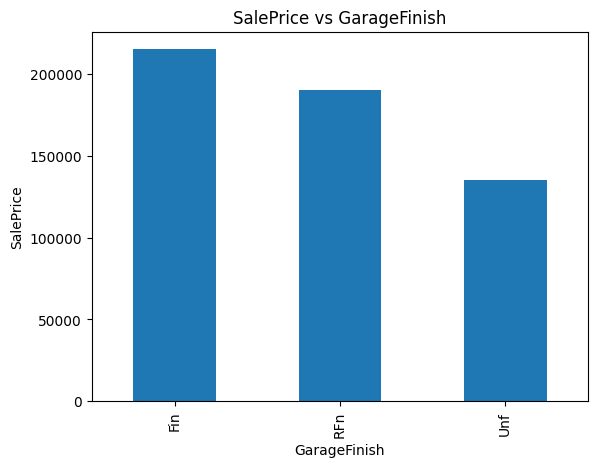

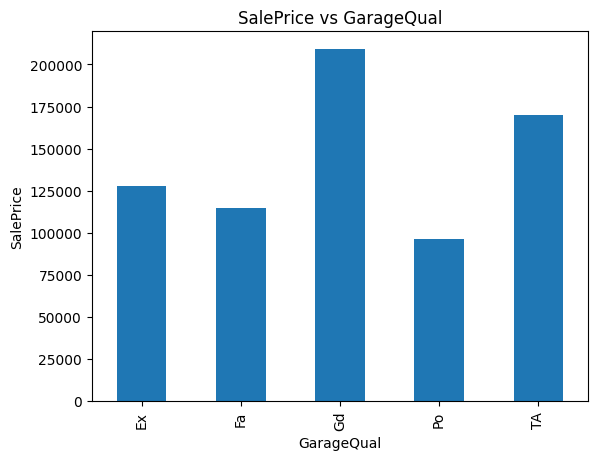

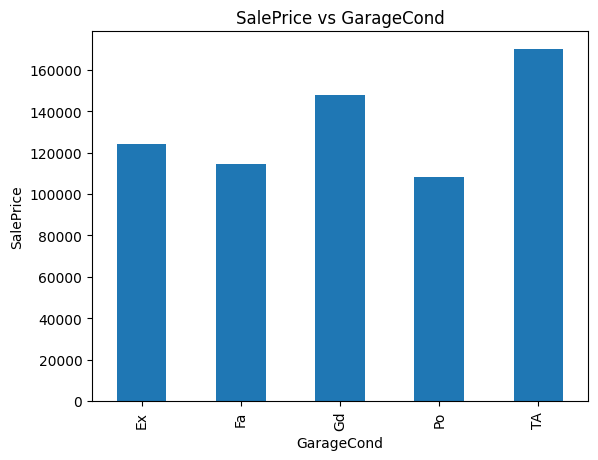

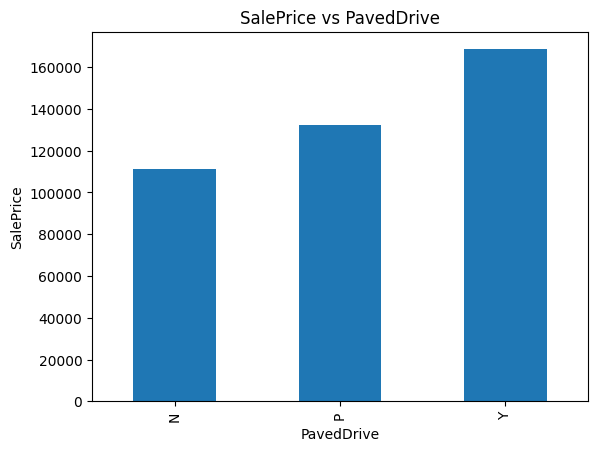

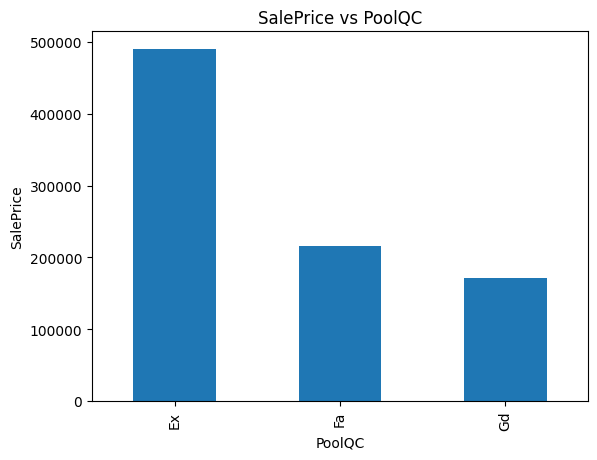

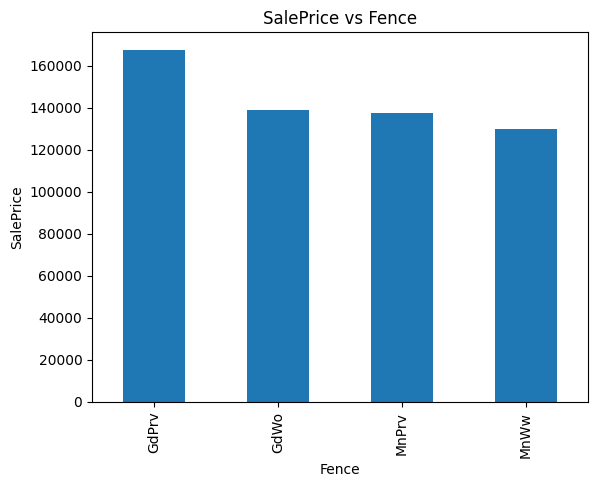

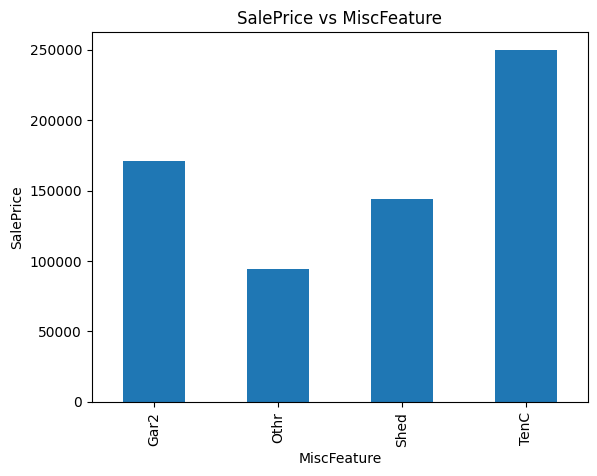

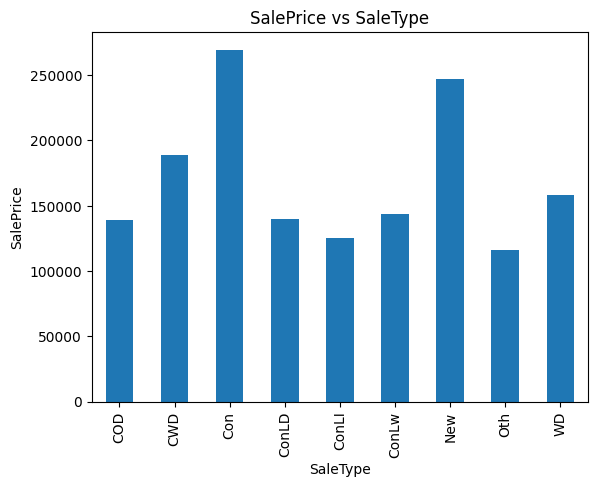

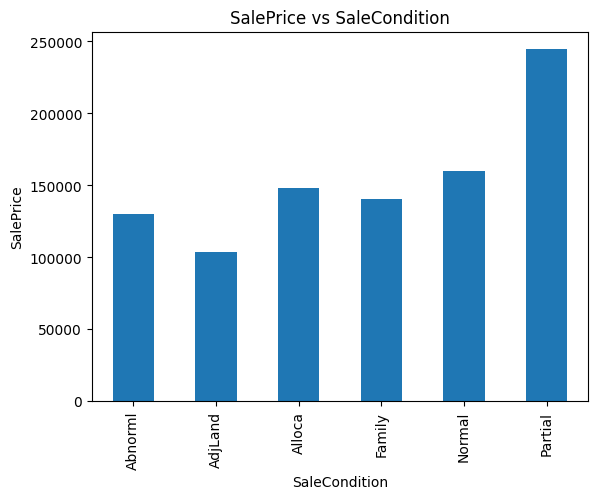

In [53]:
# Finding out the relationship between categorical features and SalePrice

for feature in cat_feat:
    data = train_data.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(f"SalePrice vs {feature}")
    plt.show()

In [54]:
pip install klib

In [55]:
import klib

<ipython-input-59-7de08d33deee>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr().abs(),  annot=True)


<Axes: >

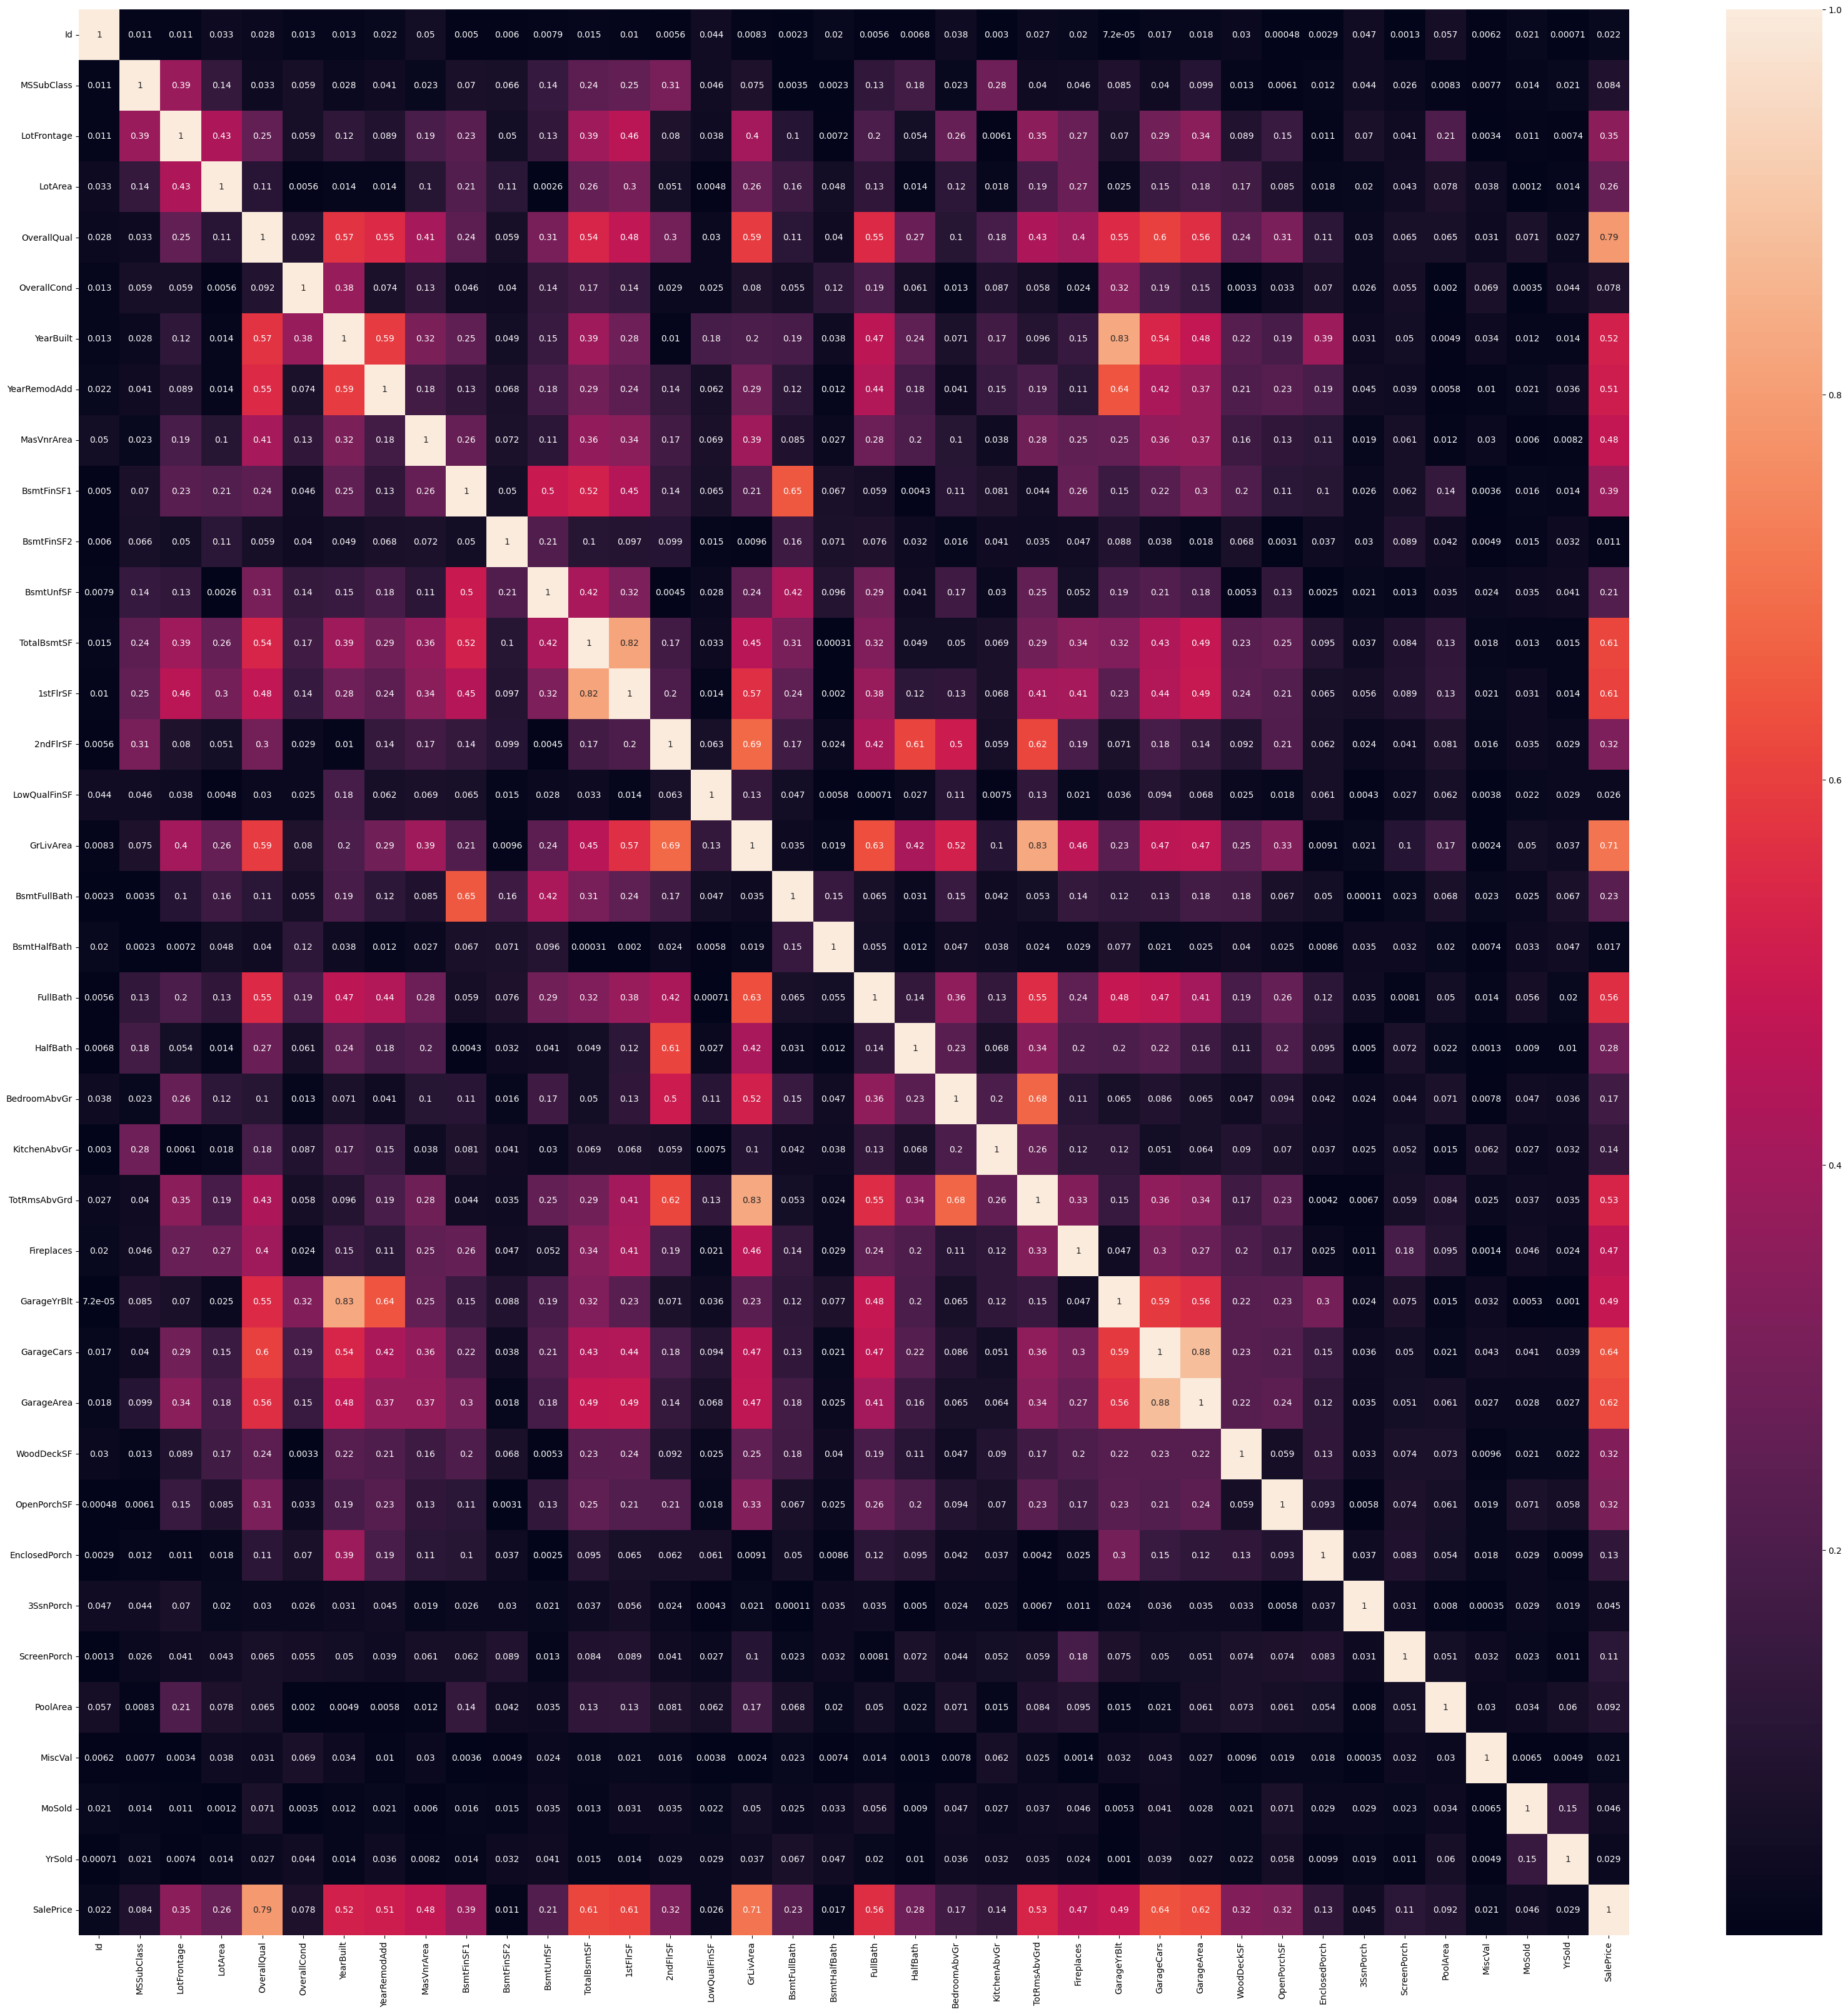

In [59]:
plt.figure(figsize=(40, 40))
sns.heatmap(data.corr().abs(),  annot=True)

In [69]:
# let's encode the categorical columns with label encoder using for loop
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in train_data.columns:
    if train_data[col].dtypes == 'object':
        train_data[col] = le.fit_transform(train_data[col].astype(str))

In [74]:
# Impute missing values in the 'Fence' column with a category indicating no fence

# Impute missing values in 'LotFrontage' with the median
train_data['LotFrontage'].fillna(train_data['LotFrontage'].median(), inplace=True)

# Impute missing values in 'GarageYrBlt' with a placeholder (e.g., 0)
train_data['GarageYrBlt'].fillna(0, inplace=True)

# Impute missing values in 'MasVnrArea' with zero
train_data['MasVnrArea'].fillna(0, inplace=True)

In [75]:

# Get dependent and independent variables - X and y
X = train_data.drop(["SalePrice"],axis=1)
y = train_data.SalePrice

In [88]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)

from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [91]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)
# Fitting the linear regression model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train_scaled,y_train)
y_pred_train = regr.predict(X_train_scaled)


In [92]:
y_pred_train

array([119274.56708506, 179455.23348616, 120389.40795033, ...,
       126963.53308909, 193119.02362535, 190353.42503026])

In [94]:
# Use MSE to evaluate the above model(assignment)
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred_train)))

R squared: 0.8863639150946221


In [95]:
residuals = y_train.values-y_pred_train
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 0.8177540218925898


In [97]:
# Finding interception and coefficients
print(regr.intercept_)
print(list(regr.coef_))

180719.8473738724
[10.751340355998087, -4407.298108065686, -673.9722084617242, 691.7353726494839, 5861.745644553413, 2779.2311700154896, 1545.2326022943307, -446.309458168917, 1760.4185556754405, -1256.3980967619018, 492.1497955159739, 12.433622580171686, 723.5261606786562, -1860.9085761747294, -7071.333699635305, -294.1308390560698, -1787.7315844802015, 13399.56572426246, 6130.201735559658, 6850.792664751062, 918.3114513612754, 1805.3090160623951, 1932.9128933607717, -3788.9423863991688, 2797.1219018726406, 3189.1459282755386, 6268.973672737455, -5848.325088896847, 444.6939570623217, 1938.7814534067875, -7000.966108869994, 2035.9886185596697, -2319.0985567276366, 671.201861207257, -5.1240780968035864e+16, 1585.0181047090446, -1.8750877397939772e+16, -5.1454956263933656e+16, 4.846826518445277e+16, -687.8192447969632, -1037.132578937977, -47.10509231509059, -999.7088688906515, 4.035132785139166e+16, 4.722093133678662e+16, 5527156428926063.0, -5.5430403037680904e+16, 891.0955349911819, 6

In [98]:
y_pred_test = regr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [99]:
#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_test, y_test)

# R_square
R_square_sk = regr.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) or J(theta) is:  5.734902681025266e+38
R square obtain for scikit learn library is : -8.686723662552488e+28


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
